In [88]:
import torch

数据操作

In [89]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [90]:
x.shape

torch.Size([12])

In [91]:
x.numel()

12

In [92]:
X = x.reshape(3, 4)
X1 = x.reshape(-1, 4)
X2 = x.reshape(3, -1)
X, X1, X2

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [93]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [94]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [95]:
torch.randn(3, 4)

tensor([[ 1.2338e+00, -1.5922e+00,  4.1589e-01,  2.0049e+00],
        [ 1.1710e+00, -1.8337e-03,  2.1394e-01, -2.6061e-02],
        [ 1.8139e+00,  1.7912e-01,  6.5177e-01, -1.0220e+00]])

In [96]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

常用运算符

In [97]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [98]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [99]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [100]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [101]:
X.sum()

tensor(66.)

广播机制

In [102]:
a = torch.arange(3).reshape((3, 1, 1))
b = torch.arange(6).reshape((1, 2, 3))
a, b

(tensor([[[0]],
 
         [[1]],
 
         [[2]]]),
 tensor([[[0, 1, 2],
          [3, 4, 5]]]))

In [103]:
a + b

tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[2, 3, 4],
         [5, 6, 7]]])

索引和切片

In [104]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

python中数据值的传递是引用
赋值运算符可以改变变量的引用

对于不可变对象（如整数、浮点数、字符串、元组），y = x + y 和 y += x 在功能上是等价的，但它们在内部的处理上有所不同：


y = x + y：这会创建一个新的对象来存储x和y的和，并将y的引用指向这个新对象。因此，y的内存地址会改变。

y += x：由于Python中的+=操作符对于不可变类型进行了优化，实际上会执行类似y = type(y)(y + x)的操作（但更高效），同样会创建一个新的对象，并将y的引用更新为这个新对象。因此，y的内存地址也会改变。不过，值得注意的是，在Python的某些实现（特别是CPython）中，对于整数这样的小对象，可能存在一个“小整数池”优化，但这不影响y的内存地址变化的基本事实。


可变对象（如列表、字典、集合）

y = x + y（假设x和y都是列表）：这会创建一个新的列表来存储x和y的拼接结果，并将y的引用指向这个新列表。因此，y的内存地址会改变。

y += x：对于可变对象，+=操作符会直接在原对象上进行修改（而不是创建一个新对象），因此y的内存地址不会改变。

+调用的是add方法，add方法会将相加之后的值赋值给新变量。
+=调用的是iadd方法，iadd方法会进行原地操作。不可变类型的变量的+=不进行原地操作的原因是不可变类型是没有iadd方法的，因此会重载add方法。

In [105]:
a = 10
b = a
print(id(a), id(b))

2195497314896 2195497314896


In [106]:
a = 10
b = 20
print(id(a), id(b))
a += b
print(id(a))
b += a
print(id(b))

2195497314896 2195497315216
2195497315536
2195497316176


In [107]:
before = id(Y)
print("id(Y1):", id(Y))
Y = Y + X
print("id(Y2):", id(Y))
id(Y) == before

id(Y1): 2196573670512
id(Y2): 2196573618400


False

In [108]:
before = id(Y)
print("id(Y1):", id(Y))
Y += X
print("id(Y2):", id(Y))
id(Y) == before

id(Y1): 2196573618400
id(Y2): 2196573618400


True

In [109]:
Z = torch.zeros_like(Y)
print("id(Z):", id(Z))
Z[:] = X + Y
print("id(Z):", id(Z))

id(Z): 2196572487568
id(Z): 2196572487568


In [110]:
before = id(X)
X += Y
id(X) == before

True

转换为其他Python对象

In [111]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)
B = 0
A, B

(array([[ 2.,  4., 10., 12.],
        [13., 17., 21., 25.],
        [28., 30., 32., 34.]], dtype=float32),
 0)

torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。

torch张量和numpy数组的地址不一样，但共享内存更新torch张量会改变numpy数组。而要把一个numpy转为tensor
a = numpy.ones(5)，
方法一 b = torch.tensor(a) 相当于创建一个新tensor，不会共享内存
方法二 b = torch.from_numpy(a) 相当于从获取numpy中的值，会共享内存

故.numpy和from_numpy会共享内存，torch.tensor不会共享内存

In [112]:
# 创建一个NumPy数组
import numpy as np

numpy_array = np.arange(5)
print("Original NumPy Array:", numpy_array)

# 将NumPy数组转换为PyTorch张量
torch_tensor = torch.from_numpy(numpy_array)
print("Converted PyTorch Tensor:", torch_tensor)
print(numpy_array)

Original NumPy Array: [0 1 2 3 4]
Converted PyTorch Tensor: tensor([0, 1, 2, 3, 4], dtype=torch.int32)
[0 1 2 3 4]


In [113]:
# 从张量转换得到的NumPy数组
print(numpy_array)
numpy_array = torch_tensor.numpy()

# 对PyTorch张量进行就地操作
torch_tensor.add_(1)  # 每个元素加一
print("After in-place operation on PyTorch Tensor:", torch_tensor)
print("NumPy Array after PyTorch Tensor in-place operation:", numpy_array)

[0 1 2 3 4]
After in-place operation on PyTorch Tensor: tensor([1, 2, 3, 4, 5], dtype=torch.int32)
NumPy Array after PyTorch Tensor in-place operation: [1 2 3 4 5]


数据预处理

读取数据集

In [114]:
import os

os.makedirs(os.path.join("..", "data"), exist_ok=True)
data_file = os.path.join("..", "data", "house_tiny.csv")
with open(data_file, "w") as f:
    f.write("NumRooms,Alley,Price\n")  # 列名
    f.write("NA,Pave,127500\n")  # 每行表示一个数据样本
    f.write("2,NA,106000\n")
    f.write("4,NA,178100\n")
    f.write("NA,NA,140000\n")

In [115]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


处理缺失值

In [116]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]  # [ : , : ]前面是行，后面是列
# inputs = inputs.fillna(inputs.mean()) # 第2列识别为str，无法进行数值平均运算，我们在括号加入限制条件，仅在数据类型为数值的列进行平均值插值。
# fillna函数是pandas库中用于处理缺失值的一个方法。它可以用指定的值、方法或字典来填充数据集中的空值。
inputs = inputs.fillna(inputs.mean(numeric_only=True))
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [117]:
# get_dummies() 利用pandas实现one hot encode的方式
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


In [118]:
import torch

# to_numpy()方法将Pandas DataFrame或Series转换为NumPy数组
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

练习

In [119]:
import os

data_file1 = os.path.join("..", "data", "house_tiny1.csv")
with open(data_file1, "w") as f:
    f.write("NumRooms,Alley,size,Price\n")  # 列名
    f.write("NA,Pave,NA,127500\n")  # 每行表示一个数据样本
    f.write("2,NA,NA,106000\n")
    f.write("4,NA,NA,178100\n")
    f.write("NA,NA,NA,140000\n")

In [120]:
data1 = pd.read_csv(data_file1)
data1

NumRooms Alley  size   Price
0       NaN  Pave   NaN  127500
1       2.0   NaN   NaN  106000
2       4.0   NaN   NaN  178100
3       NaN   NaN   NaN  140000

In [121]:
def drop_mostNA(data):
    """
    isna(): 判断是否为缺失值(NaN)
    sum(): 沿着0轴求和
    idxmax(): 找出这个Series中最大值(即缺失值最多的列)的索引
    """
    na_count = data.isna().sum(axis=0).idxmax()
    # print(na_count,type(na_count)) # dtype: int64 <class 'pandas.core.series.Series'>
    """
    pandas包含两种数据类型:series和dataframe。
    series是一种一维数据结构,每一个元素都带有一个索引,与一维数组的含义相似,其中索引可以为数字或字符串。
    index     输出‘索引’
    index[0]  在方法之后加入方括号指定某一‘索引’
    keys()    和 index 作用相同，查看‘索引’
    keys()[0] 在方法之后加入方括号指定某一‘索引’
    values    查看 Series 值
    size      查看 Serise 中元素的数量 

    """
    return na_count


data1.drop(columns=drop_mostNA(data1))

NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000

In [122]:
inputs1 = torch.tensor(
    pd.get_dummies(data1.iloc[:, :], dummy_na=True).to_numpy(dtype=float)
)
target1 = torch.tensor(data1.iloc[:, -1])
inputs1, target1

(tensor([[       nan,        nan, 1.2750e+05, 1.0000e+00, 0.0000e+00],
         [2.0000e+00,        nan, 1.0600e+05, 0.0000e+00, 1.0000e+00],
         [4.0000e+00,        nan, 1.7810e+05, 0.0000e+00, 1.0000e+00],
         [       nan,        nan, 1.4000e+05, 0.0000e+00, 1.0000e+00]],
        dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

线性代数

标量简单操作

\begin{aligned}c&=a+b\\c&=a\cdot b\\c&=\sin a\end{aligned}

标量长度

\begin{aligned}
\left|a\right|& =\begin{cases}a&\text{if}a>0\\-a&\text{otherwise}\end{cases} \\
|a+b|& \leq|a|+|b| \\
\left|\begin{matrix}{a\cdot b}\\\end{matrix}\right|& =|a|\cdot|b| 
\end{aligned}

向量简单操作

\begin{aligned}&c=a+b\quad\mathrm{where~}c_i=a_i+b_i\\&c=\alpha\cdot b\quad\mathrm{where~}c_i=\alpha b_i\\&c=\sin a\quad\mathrm{where~}c_i=\sin a_i\end{aligned}

向量长度

\begin{aligned}
\left\|a\right\|_{2}& =\left[\sum_{i=1}^ma_i^2\right]^{\frac12} \\
\left\|a\right\|& \geq0\mathrm{~for~all~}a \\
\left\|a+b\right\|& \leq\|a\|+\|b\| \\
\left\|a\cdot b\right\|& =|a|\cdot\|b\| 
\end{aligned}

可以发现以附件形式出现的图片，并不以文件形式保存在磁盘上，而是以Base64编码形式直接保存在.ipynb文件中 

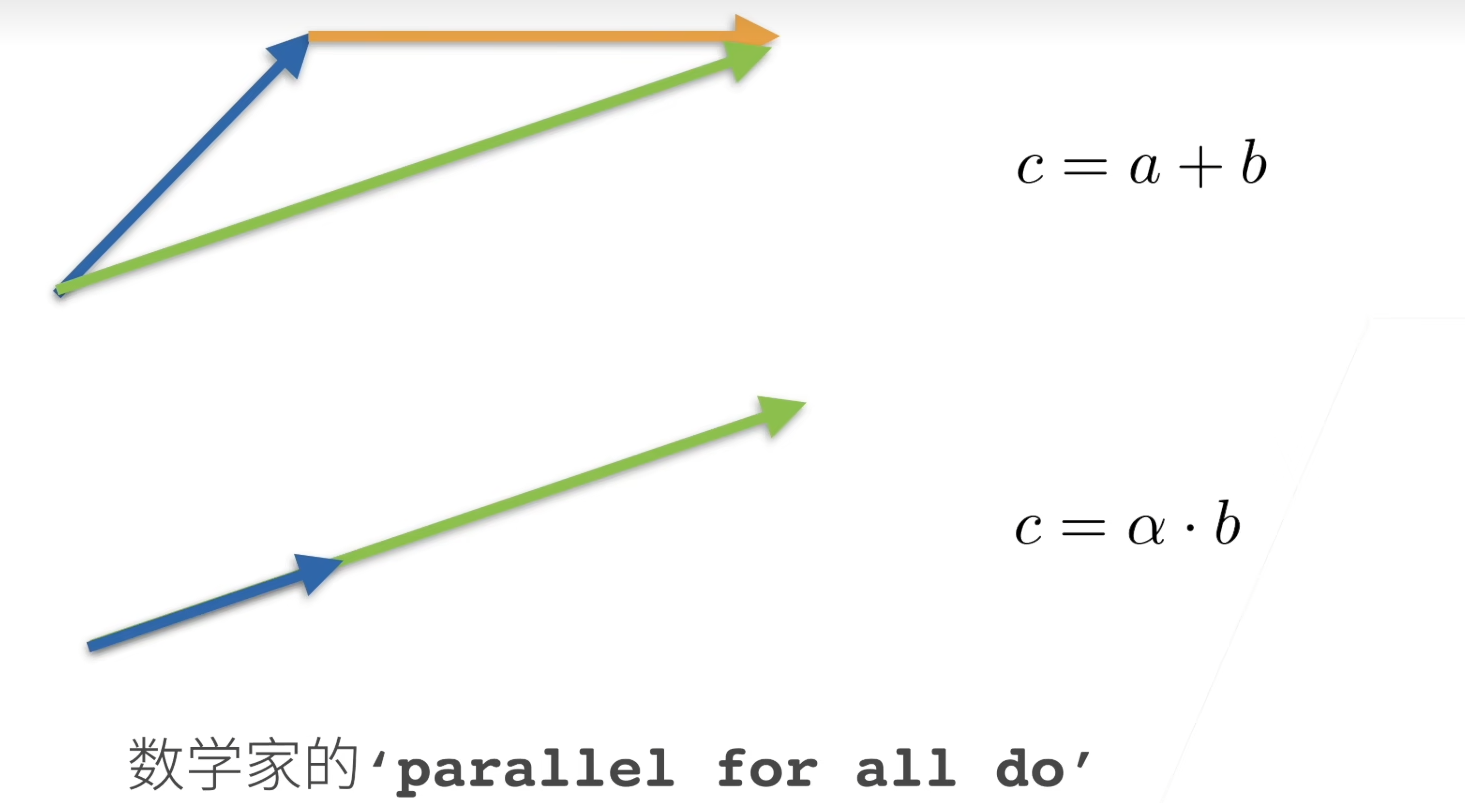

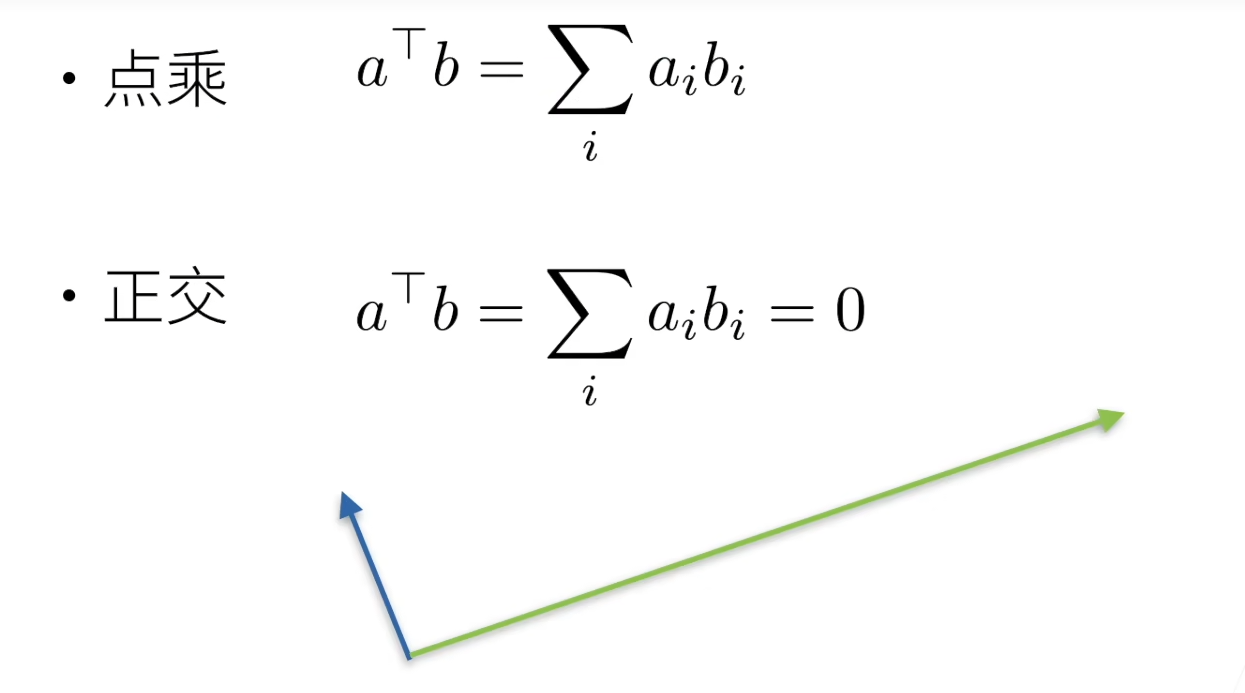

矩阵简单操作

\begin{aligned}C&=A+B\quad\text{where }C_{ij}=A_{ij}+B_{ij}\\C&=\alpha\cdot B\quad\text{where }C_{ij}=\alpha B_{ij}\\C&=\sin A\quad\text{where }C_{ij}=\sin A_{ij}\end{aligned}

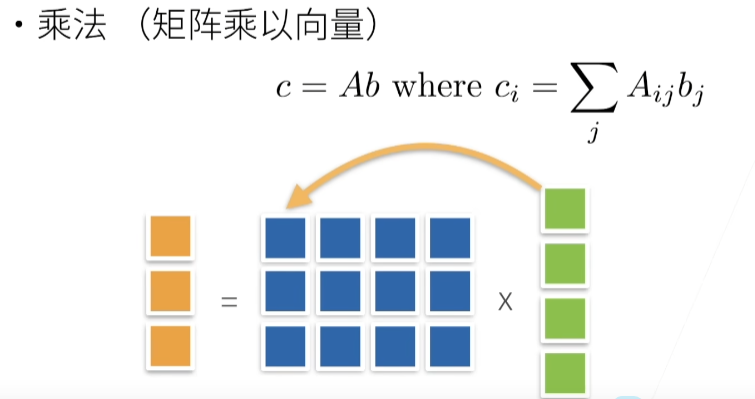

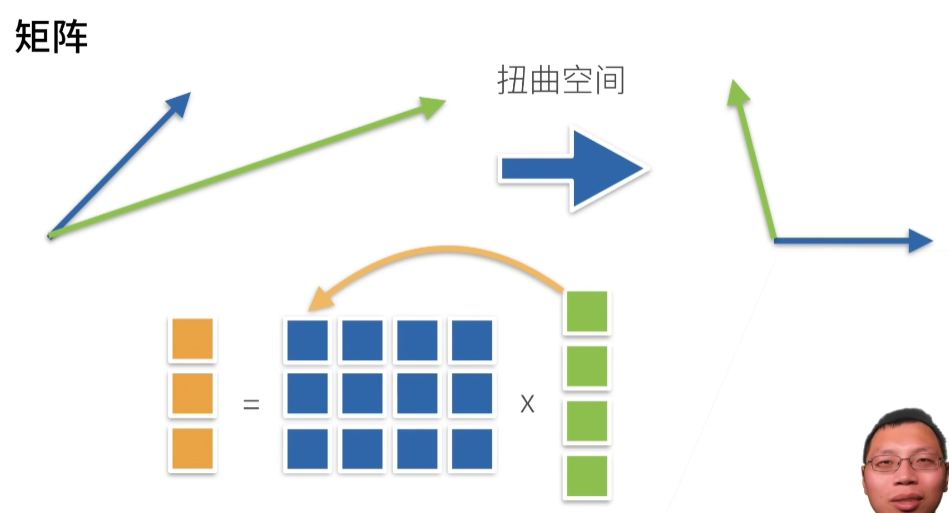

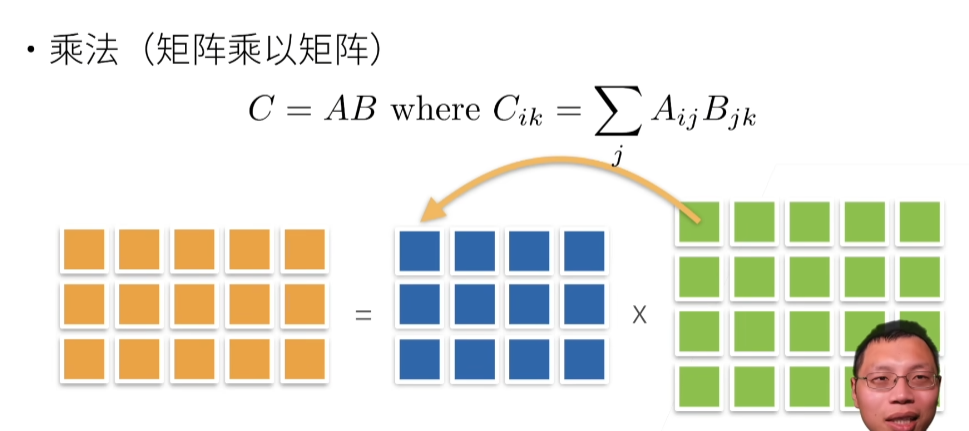

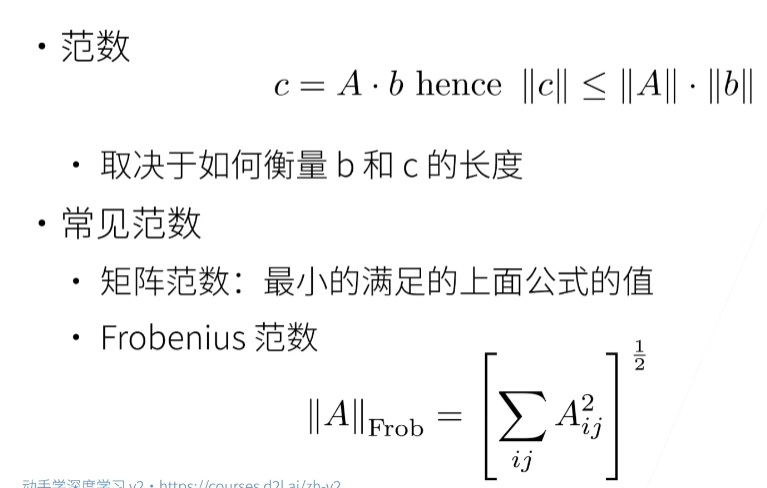

范数用来表示向量、矩阵的大小

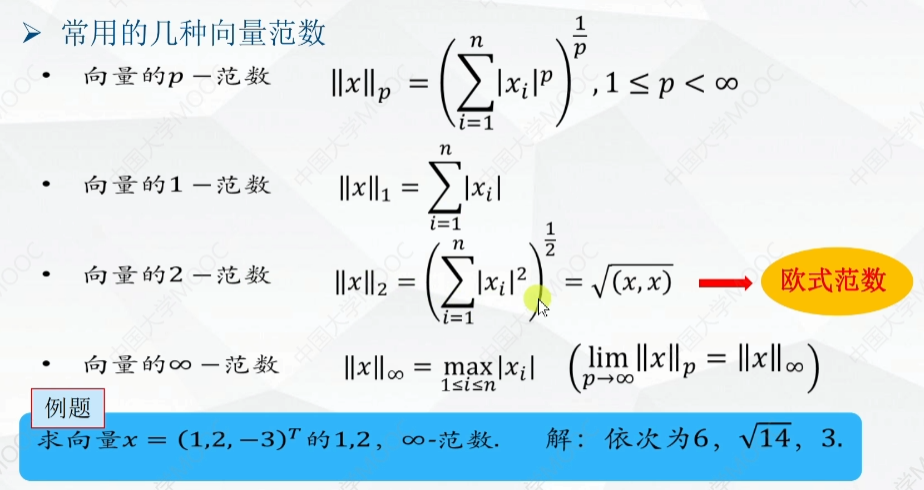

L2范数欧几里得距离
L1范数曼哈顿距离

欧氏距离（Euclidean Distance）

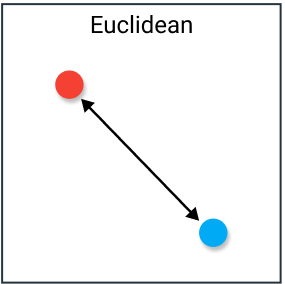

欧式距离可解释为连接两个点的线段的长度。欧式距离公式非常简单，使用勾股定理从这些点的笛卡尔坐标计算距离。

\begin{equation}
    D(x,y)=\sqrt{\sum_{i=1}^n\left(x_i\:-y_i\right)^2}
\end{equation}

缺点：尽管这是一种常用的距离度量，但欧式距离并不是尺度不变的，这意味着所计算的距离可能会根据特征的单位发生倾斜。通常，在使用欧式距离度量之前，需要对数据进行归一化处理。

此外，随着数据维数的增加，欧氏距离的作用也就越小。这与维数灾难（curse of dimensionality）有关。

用例：当你拥有低维数据且向量的大小非常重要时，欧式距离的效果非常好。如果在低维数据上使用欧式距离，则如 K-NN 和 HDBSCAN 之类的方法可达到开箱即用的效果。

曼哈顿距离（Manhattan Distance）

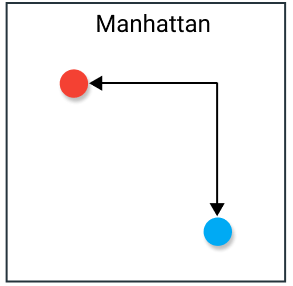

曼哈顿距离通常称为出租车距离或城市街区距离，用来计算实值向量之间的距离。想象一下均匀网格棋盘上的物体，如果它们只能移动直角，曼哈顿距离是指两个向量之间的距离，在计算距离时不涉及对角线移动。

\begin{equation}
    D(x,y)=\sum_{i=1}^k|x_i-y_i|
\end{equation}

缺点：尽管曼哈顿距离在高维数据中似乎可以工作，但它比欧式距离直观性差，尤其是在高维数据中使用时。此外，由于它可能不是最短路径，有可能比欧氏距离给出一个更高的距离值。

用例：当数据集具有离散或二进制属性时，曼哈顿距离似乎工作得很好，因为它考虑了在这些属性的值中实际可以采用的路径。以欧式距离为例，它会在两个向量之间形成一条直线，但实际上这是不可能的。

切比雪夫距离（Chebyshev Distance）

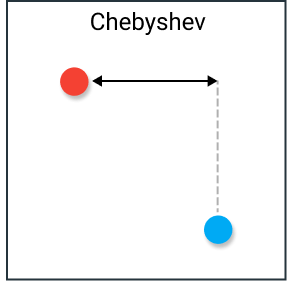

切比雪夫距离定义为两个向量在任意坐标维度上的最大差值。换句话说，它就是沿着一个轴的最大距离。切比雪夫距离通常被称为棋盘距离，因为国际象棋的国王从一个方格到另一个方格的最小步数等于切比雪夫距离。

\begin{equation}
    D(x,y)=max_i(|x_i-y_i|)
\end{equation}

缺点：切比雪夫距离通常用于特定的用例，这使得它很难像欧氏距离或余弦相似度那样作为通用的距离度量。因此，在确定适合用例时才使用它。

用例：切比雪夫距离用于提取从一个方块移动到另一个方块所需的最小移动次数。此外，在允许无限制八向移动的游戏中，这可能是有用的方法。在实践中，切比雪夫距离经常用于仓库物流，因为它非常类似于起重机移动一个物体的时间。

余弦相似度（Cosine Similarity）

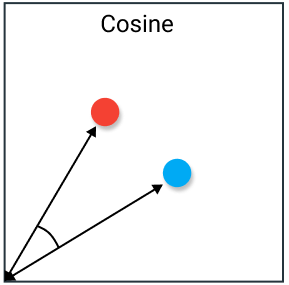

余弦相似度经常被用作抵消高维欧式距离问题。余弦相似度是指两个向量夹角的余弦。如果将向量归一化为长度均为 1 的向量，则向量的点积也相同。

两个方向完全相同的向量的余弦相似度为 1，而两个彼此相对的向量的余弦相似度为 - 1。注意，它们的大小并不重要，因为这是在方向上的度量。

\begin{equation}
    D(x,y)=cos(\theta)=\frac{x\cdot y}{||x||y||}
\end{equation}

缺点：余弦相似度的一个主要缺点是没有考虑向量的大小，而只考虑它们的方向。以推荐系统为例，余弦相似度就没有考虑到不同用户之间评分尺度的差异。

用例：当我们对高维数据向量的大小不关注时，可以使用余弦相似度。对于文本分析，当数据以单词计数表示时，经常使用此度量。例如，当一个单词在一个文档中比另一个单词更频繁出现时，这并不一定意味着文档与该单词更相关。可能是文件长度不均匀或者计数的重要性不太重要。我们最好使用忽略幅度的余弦相似度。

参考来源：https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

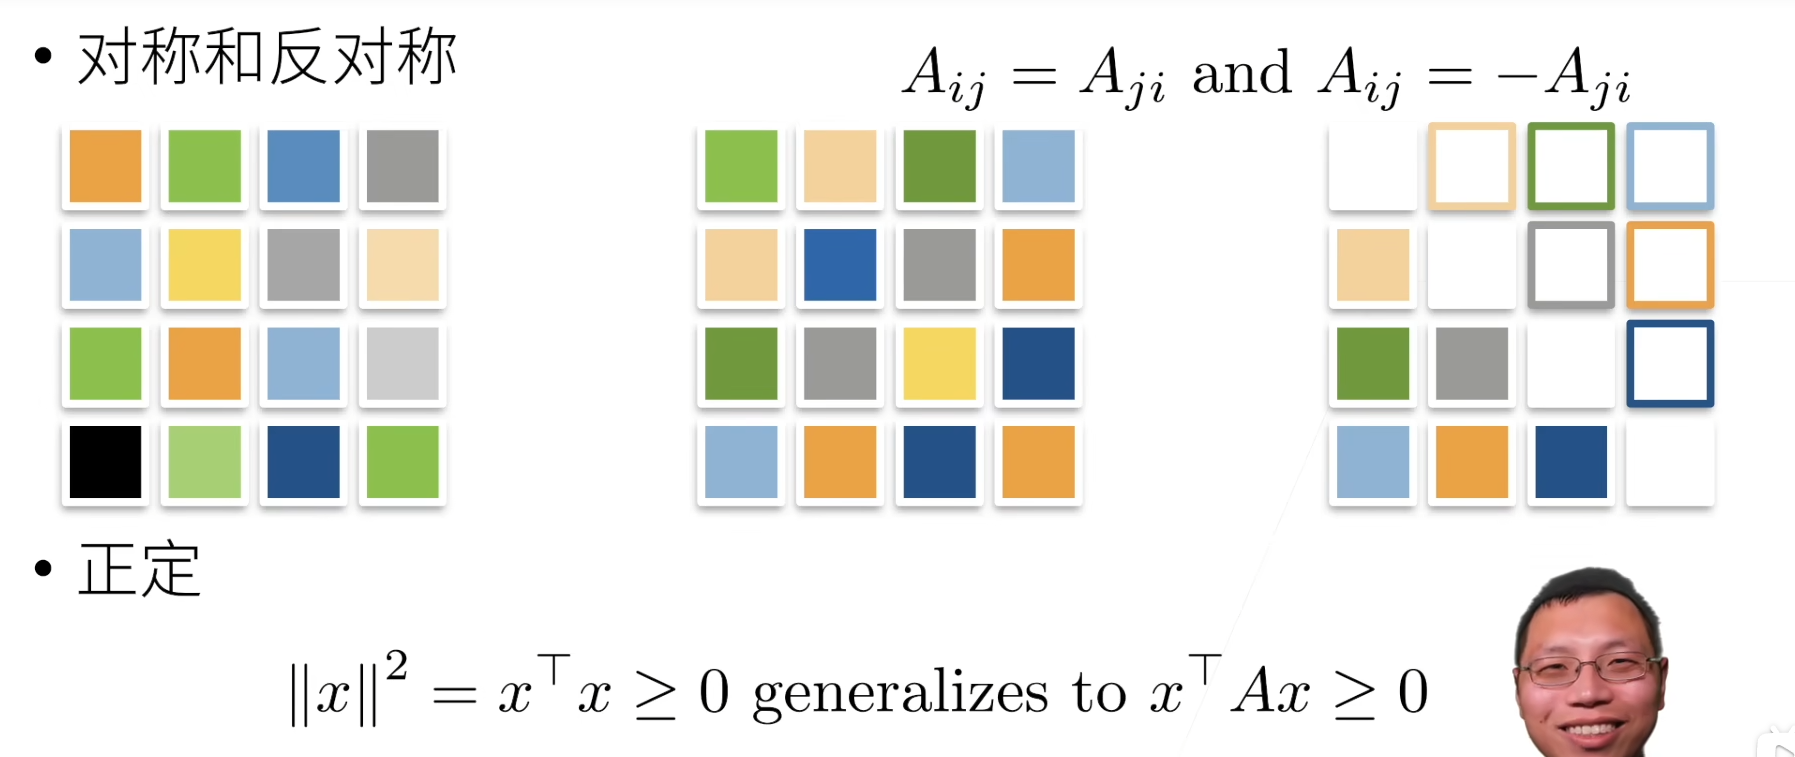

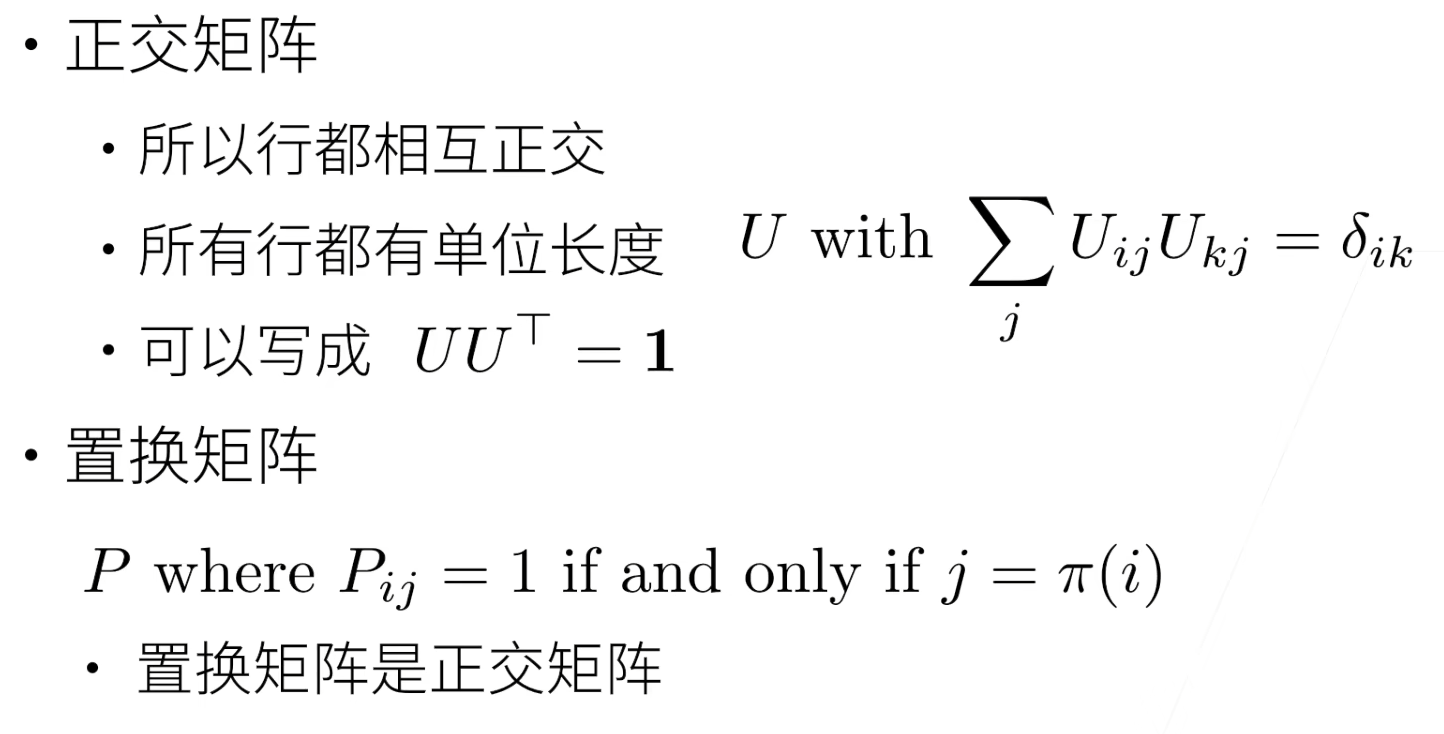

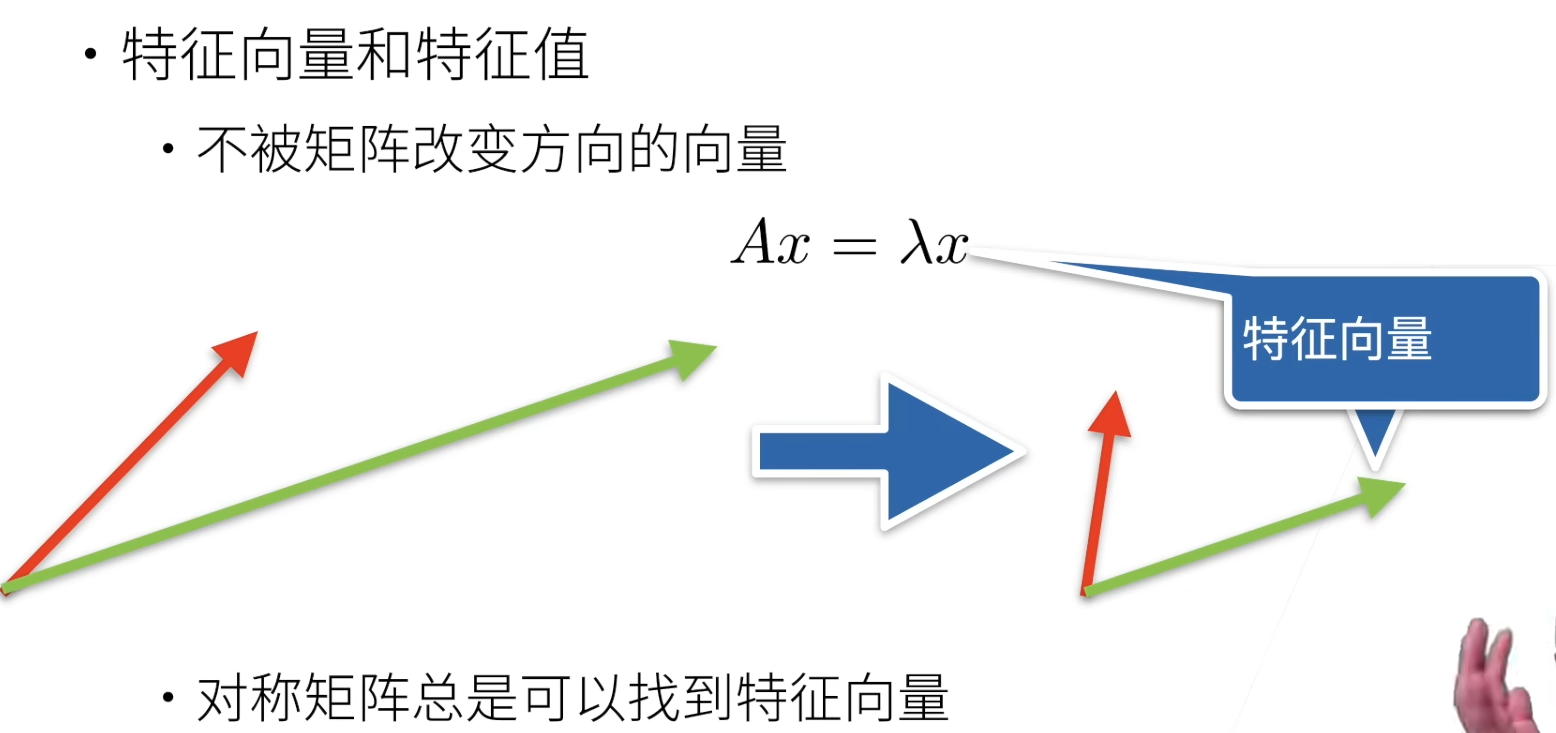

标量

In [123]:
# 标量由只有一个元素的张量表示
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

向量

In [124]:
x = torch.arange(4)
x, x[3]

(tensor([0, 1, 2, 3]), tensor(3))

长度、维度和形状。
数组、向量与张量“维度”的理解。
向量的维度：向量的维度是指该向量所具有的坐标数或分量数。例如，一个二维向量拥有两个坐标，通常表示为 (x, y)，其中 x 和 y 是实数。一个三维向量则有三个坐标，通常表示为 (x, y, z)。向量的维度可以是任意正整数，可以表示在 n 维空间中的位置或方向。
张量的维度：张量的维度用来表示张量具有的轴数。

In [125]:
len(x), x.shape

(4, torch.Size([4]))

矩阵

In [126]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [127]:
# 转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [128]:
# 对称矩阵 B=BT
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B, B.T, B == B.T

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

张量


In [129]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [224]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个矩阵的按元素乘法称为Hadamard积（Hadamard product）积，（数学符号⊙），同阶矩阵对应元素相乘，也就是点乘

In [225]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

torch中，使用`@`来进行张量的叉乘运算，也是常见的矩阵乘法运算

In [132]:
C = torch.arange(25, dtype=torch.float32).reshape(5, 5)
D = C.clone()
C, C @ D

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.],
         [20., 21., 22., 23., 24.]]),
 tensor([[ 150.,  160.,  170.,  180.,  190.],
         [ 400.,  435.,  470.,  505.,  540.],
         [ 650.,  710.,  770.,  830.,  890.],
         [ 900.,  985., 1070., 1155., 1240.],
         [1150., 1260., 1370., 1480., 1590.]]))

In [133]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

降维

In [134]:
# 对张量元素进行求和
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [226]:
# 可以计算任意形状张量的元素和
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。

 以矩阵为例，为了通过求和所有行的元素来降维（轴0），可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失。

In [227]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

指定axis=1将通过汇总所有列的元素降维（轴1）。因此，输入轴1的维数在输出形状中消失。

In [228]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [229]:
A.sum(axis=[0, 1])  # 结果和A.sum()相同

tensor(190.)

In [231]:
K = torch.arange(20*2).reshape(2,5,4)
K.shape,K.sum()

(torch.Size([2, 5, 4]), tensor(780))

In [233]:
K.sum(axis=2),K.sum(axis=[0,1]).shape

(tensor([[  6,  22,  38,  54,  70],
         [ 86, 102, 118, 134, 150]]),
 torch.Size([4]))

In [139]:
# 平均值 mean or average
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [140]:
# 同样可以指定轴降低张量的维度
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

非降维求和，参数`keepdims=True`

In [141]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [234]:
A.sum(axis=0, keepdims=True)

tensor([[40., 45., 50., 55.]])

In [142]:
# 由于sum_A在对每行进行求和后仍保持两个轴，我们可以通过广播将A除以sum_A。
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [143]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [144]:
# 当前元素与前面所有元素的和相加，结果存储在对应位置
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [145]:
A.cumsum(axis=1)

tensor([[ 0.,  1.,  3.,  6.],
        [ 4.,  9., 15., 22.],
        [ 8., 17., 27., 38.],
        [12., 25., 39., 54.],
        [16., 33., 51., 70.]])

向量点积
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="bold">x</mi>
    </mrow>
    <mi mathvariant="normal">&#x22A4;</mi>
  </msup>
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">y</mi>
  </mrow>
  <mo>=</mo>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>d</mi>
    </mrow>
  </munderover>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
</math>
相同位置的按元素乘积的和

In [146]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [147]:
# 或者通过执行按元素乘法，然后进行求和来表示两个向量的点积
torch.sum(x * y)

tensor(6.)

在代码中使用张量表示矩阵-向量积，我们使用mv函数。

In [148]:
A, x

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]))

In [149]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

矩阵-矩阵乘法可以简单地称为矩阵乘法，不应与“Hadamard积”混淆

以将矩阵-矩阵乘法<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">AB</mi>
  </mrow>
</math>
看作简单地执行<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>m</mi>
</math>
次矩阵-向量积，并将结果拼接在一起，形成一个
矩阵。

矩阵-矩阵乘法可以简单地称为矩阵乘法，不应与“Hadamard积”混淆。

In [150]:
B = torch.ones(4, 3)
B, torch.mm(A, B)

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

范数

In [151]:
# L2范数，向量元素平方和的平方根
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [152]:
# L1范数，向量元素的绝对值之和
torch.abs(u).sum()

tensor(7.)

矩阵的佛罗贝尼乌斯范数（Frobenius norm）是矩阵元素的平方和的平方根

\begin{equation}
    \|\mathbf{X}\|_{F}=\sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}x_{ij}^{p}}
\end{equation}

In [ ]:
torch.norm(torch.ones((4,9)))

与L2范数相比，L1范数受异常值的影响较小

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>L</mi>
    <mi>p</mi>
  </msub>
</math>范数<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mo data-mjx-texclass="ORD" fence="false" stretchy="false">&#x2016;</mo>
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">x</mi>
  </mrow>
  <msub>
    <mo data-mjx-texclass="ORD" fence="false" stretchy="false">&#x2016;</mo>
    <mi>p</mi>
  </msub>
  <mo>=</mo>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <munderover>
        <mo data-mjx-texclass="OP">&#x2211;</mo>
        <mrow data-mjx-texclass="ORD">
          <mi>i</mi>
          <mo>=</mo>
          <mn>1</mn>
        </mrow>
        <mi>n</mi>
      </munderover>
      <msup>
        <mrow data-mjx-texclass="INNER">
          <mo data-mjx-texclass="OPEN">|</mo>
          <msub>
            <mi>x</mi>
            <mi>i</mi>
          </msub>
          <mo data-mjx-texclass="CLOSE">|</mo>
        </mrow>
        <mi>p</mi>
      </msup>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
      <mrow data-mjx-texclass="ORD">
        <mo>/</mo>
      </mrow>
      <mi>p</mi>
    </mrow>
  </msup>
  <mo>.</mo>
</math>

线性代数练习

In [153]:
(A.T).T == A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

`/`：矩阵除法通常指的是矩阵的元素逐个相除，即逐元素相除

在线性代数中，除法通常用乘以一个逆矩阵来计算

In [154]:
a1=torch.arange(6).reshape(2,3)
b1=torch.ones(6).reshape(2,3)
a1/b1

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [155]:
A=torch.arange(6).reshape(2,3)

In [156]:
A, A.sum(axis=1), A.sum(axis=1, keepdim=True), A.sum(axis=0)

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([ 3, 12]),
 tensor([[ 3],
         [12]]),
 tensor([3, 5, 7]))

由于pytorch的广播机制，对某一轴进行求和成向量，依然除法可以进行运算

In [157]:
A.shape, A.sum(axis=1).shape, A.sum(axis=1, keepdim=True).shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([2]), torch.Size([2, 1]), torch.Size([3]))

但某些轴进行求和运算时，张量的形状会发生变化，例如上述的axis=1轴，

广播机制的规则

1.对齐维度：
如果两个张量的维度不同，在维度较少的张量前面添加长度为 1 的维度，使两个张量具有相同的维度。

2.从后往前比较维度：
从最后一个维度开始，逐个维度进行比较：

如果两个张量在某个维度上的长度相同，或者其中一个张量在该维度上的长度为 1，那么这两个张量在该维度上是兼容的，可以进行广播。

如果两个张量在某个维度上的长度不同且都不为 1，那么它们在该维度上不兼容，无法进行广播。

3.扩展维度：
广播时，将长度为 1 的维度扩展为与另一个张量在该维度上的长度相同。

抓住“右对齐”来理解广播机制是非常有好处的，判断任意tensor间是否可以广播，只需按照以下步骤就绝对不会出错了：

将两操作对象的shape做右对齐
空缺的位置假想为1
比较同一位置处各操作对象的维数，若相同或有一个为1，则可以广播，否则无法广播
例如两个tensor的shape分别为(8, 1, 6, 5)和 (7, 1, 5)，那么是否可以广播呢？
做右对齐, 空缺的位置假想为1:
8, 1, 6, 5
1, 7, 1, 5
按照以上规则得出是可以广播的，操作结果的shape应为(8, 7, 6, 5)

In [158]:
A/A.sum(axis=0)

tensor([[0.0000, 0.2000, 0.2857],
        [1.0000, 0.8000, 0.7143]])

In [159]:
# A/A.sum(axis=1)  #   报错

In [160]:
a=torch.tensor([[0],[10],[20],[30]])
b=torch.tensor([1,2,3,4])
a+b

tensor([[ 1,  2,  3,  4],
        [11, 12, 13, 14],
        [21, 22, 23, 24],
        [31, 32, 33, 34]])

In [161]:
A/A.sum(axis=1,keepdim=True)

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [162]:
A = torch.arange(25, dtype=torch.float32).reshape(5, 5)
B = torch.rand(25, dtype=torch.float32).reshape(5, 5)
A, B, A.T + B.T == (A + B).T

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.],
         [20., 21., 22., 23., 24.]]),
 tensor([[0.1760, 0.1137, 0.0253, 0.6884, 0.1376],
         [0.2939, 0.4985, 0.8736, 0.8738, 0.5935],
         [0.0877, 0.0910, 0.6899, 0.1646, 0.9229],
         [0.5836, 0.0064, 0.2190, 0.8245, 0.7875],
         [0.1306, 0.8773, 0.6132, 0.4249, 0.4732]]),
 tensor([[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]))

In [163]:
(A + A.T) == (A+A.T).T

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])

In [164]:
X.shape

torch.Size([2, 3, 4])

In [165]:
len(X),len(X[1][0])

(2, 4)

微积分

标量导数

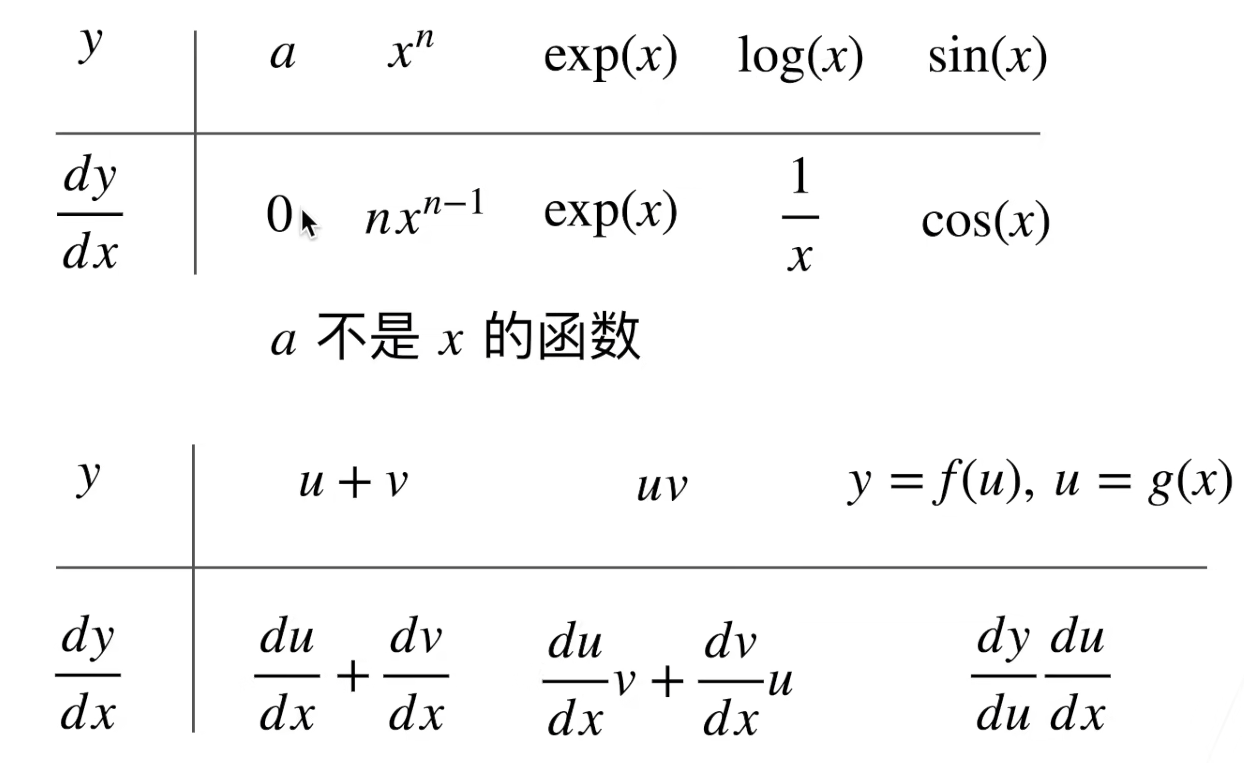

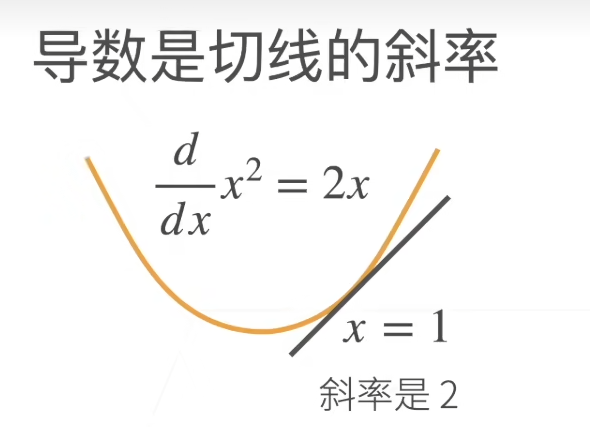

亚导数

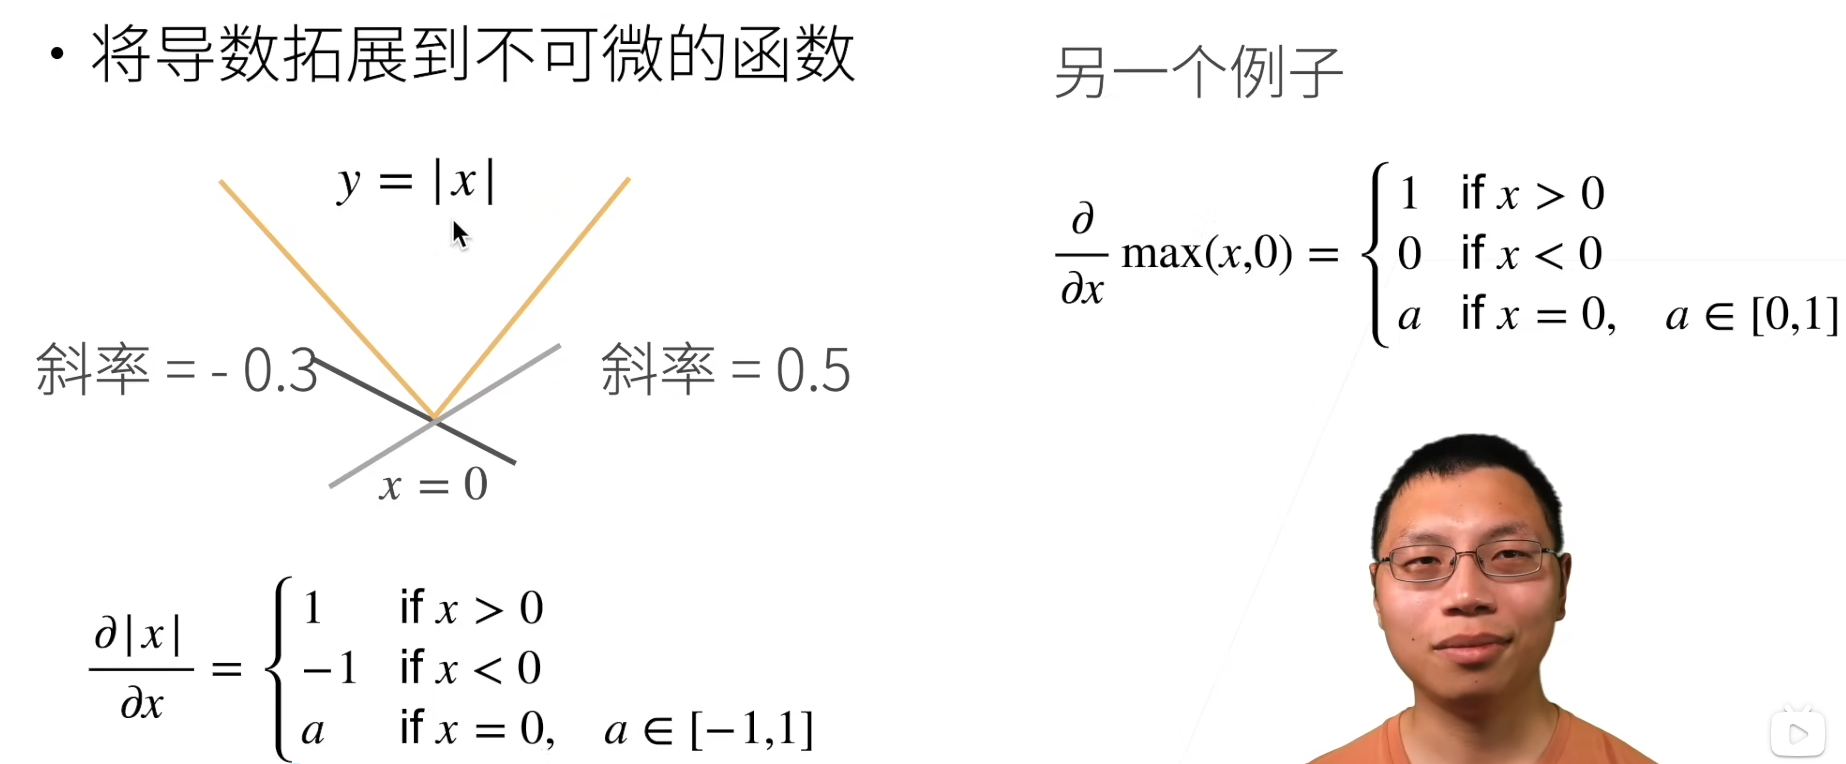

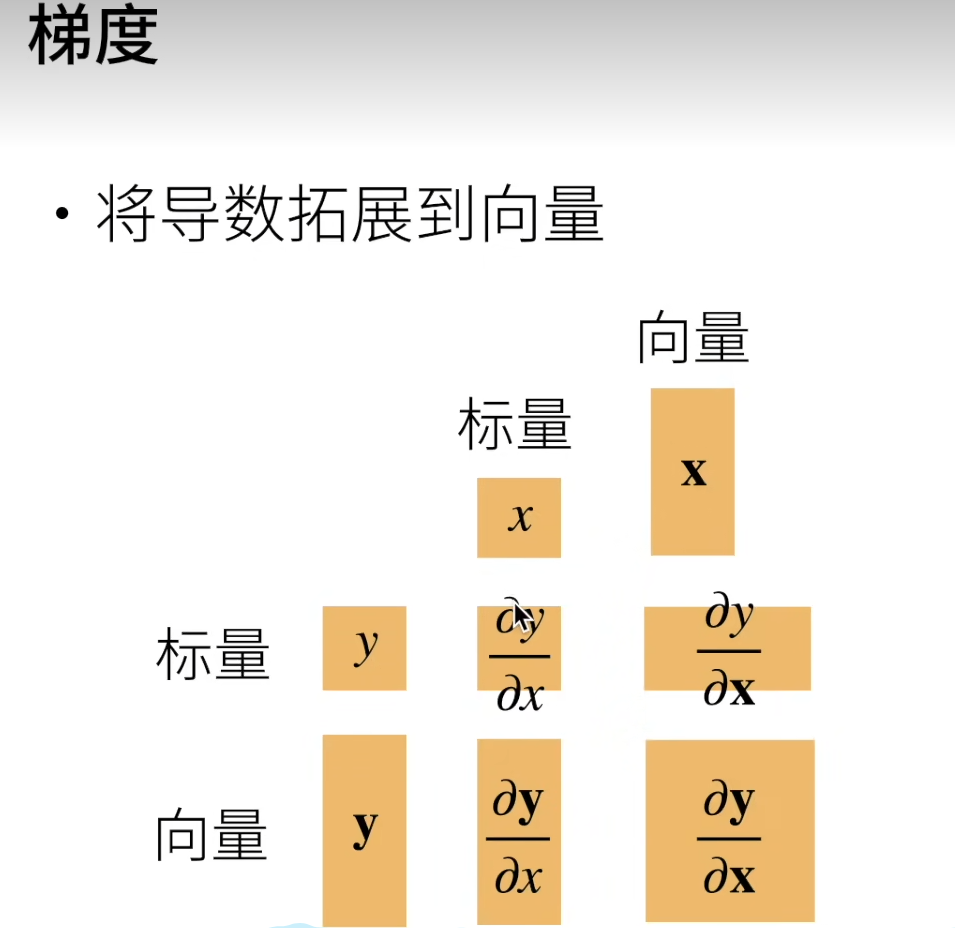

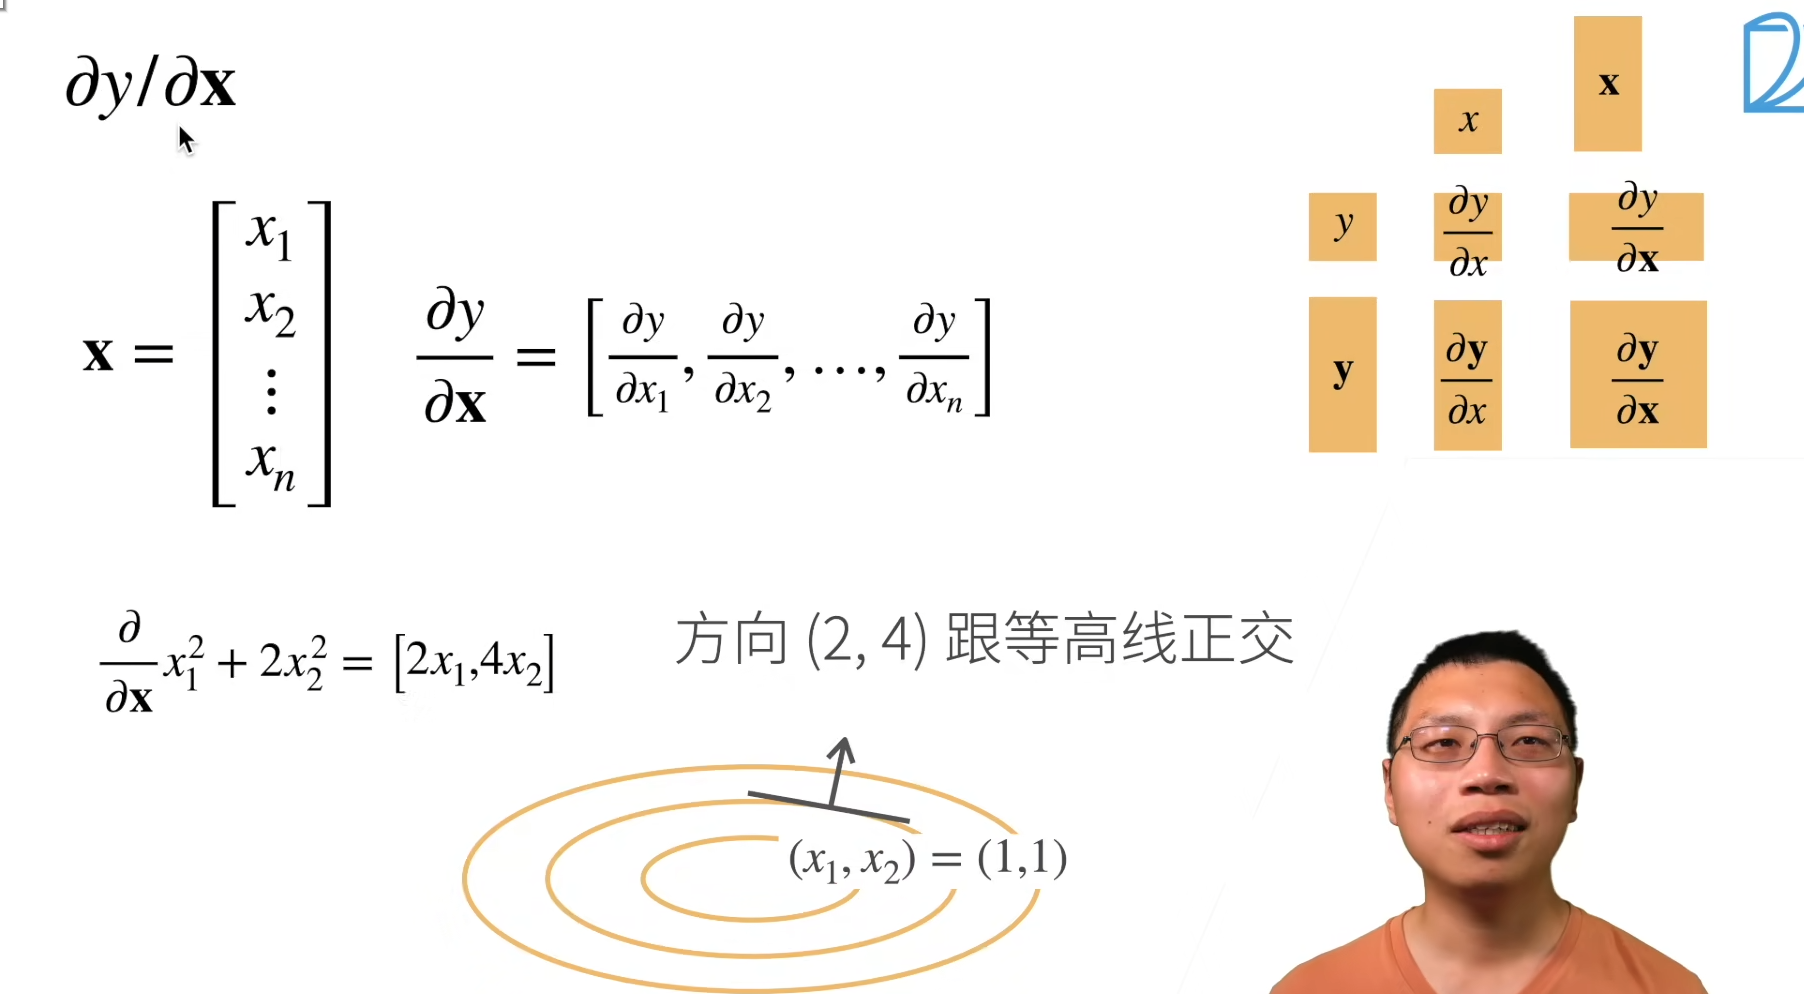

求导后的向量称为方向导数，梯度的方向与取得最大方向导数的方向一致。

梯度指向是值变化最大的方向

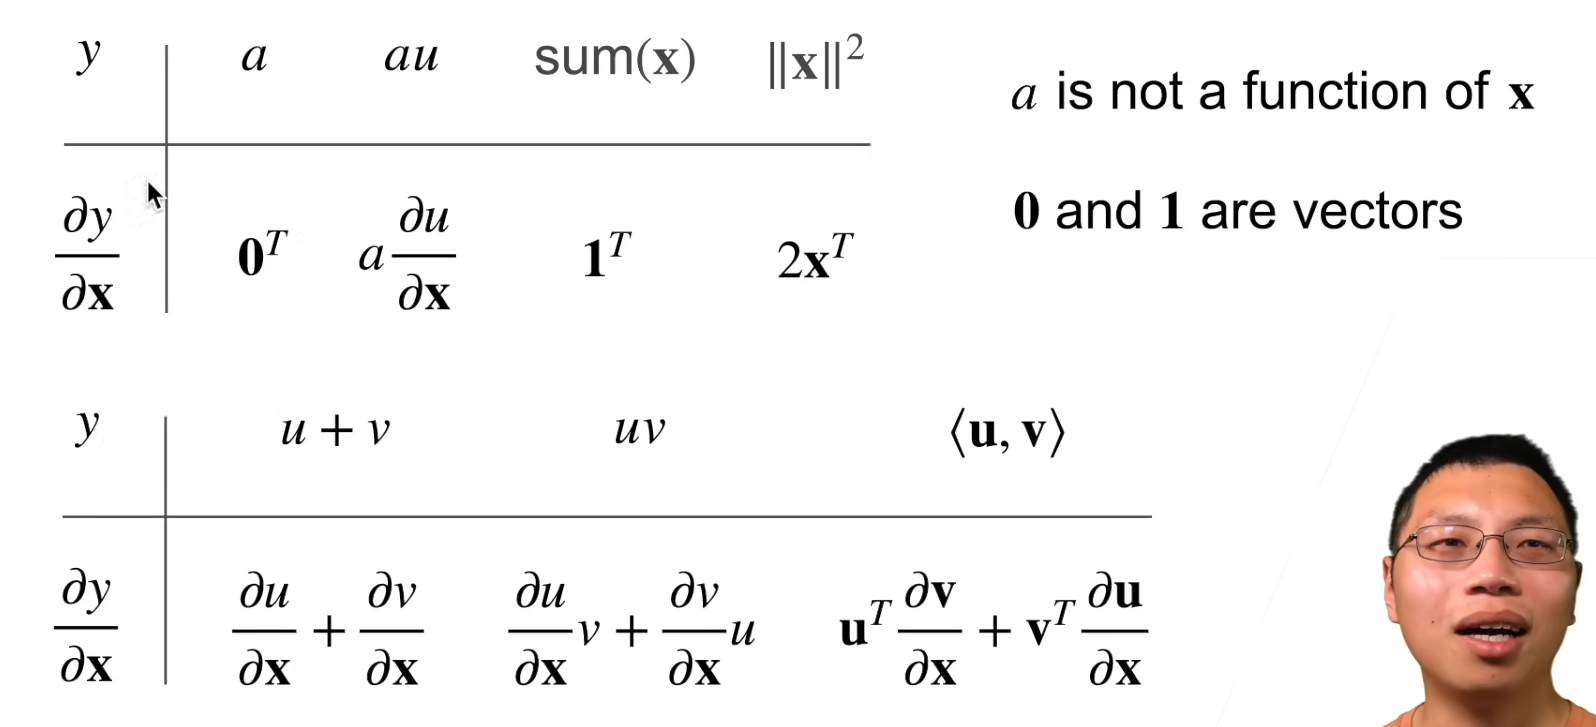

\begin{equation}
    \frac{\sin(x)=x_1+x_2+\cdots+x_{n}}{\frac{\partial\sin(x)}{\partial x}=\left\lbrack\frac{\partial(x_1+\cdots+x_{n})}{\partial x_1},\cdots,\frac{\partial(x_1+\cdots+x_{n})}{\partial x_{n}}\right\rbrack=\left\lbrack1,1,^{\ldots\ldots},1,1\right\rbrack}
\end{equation}

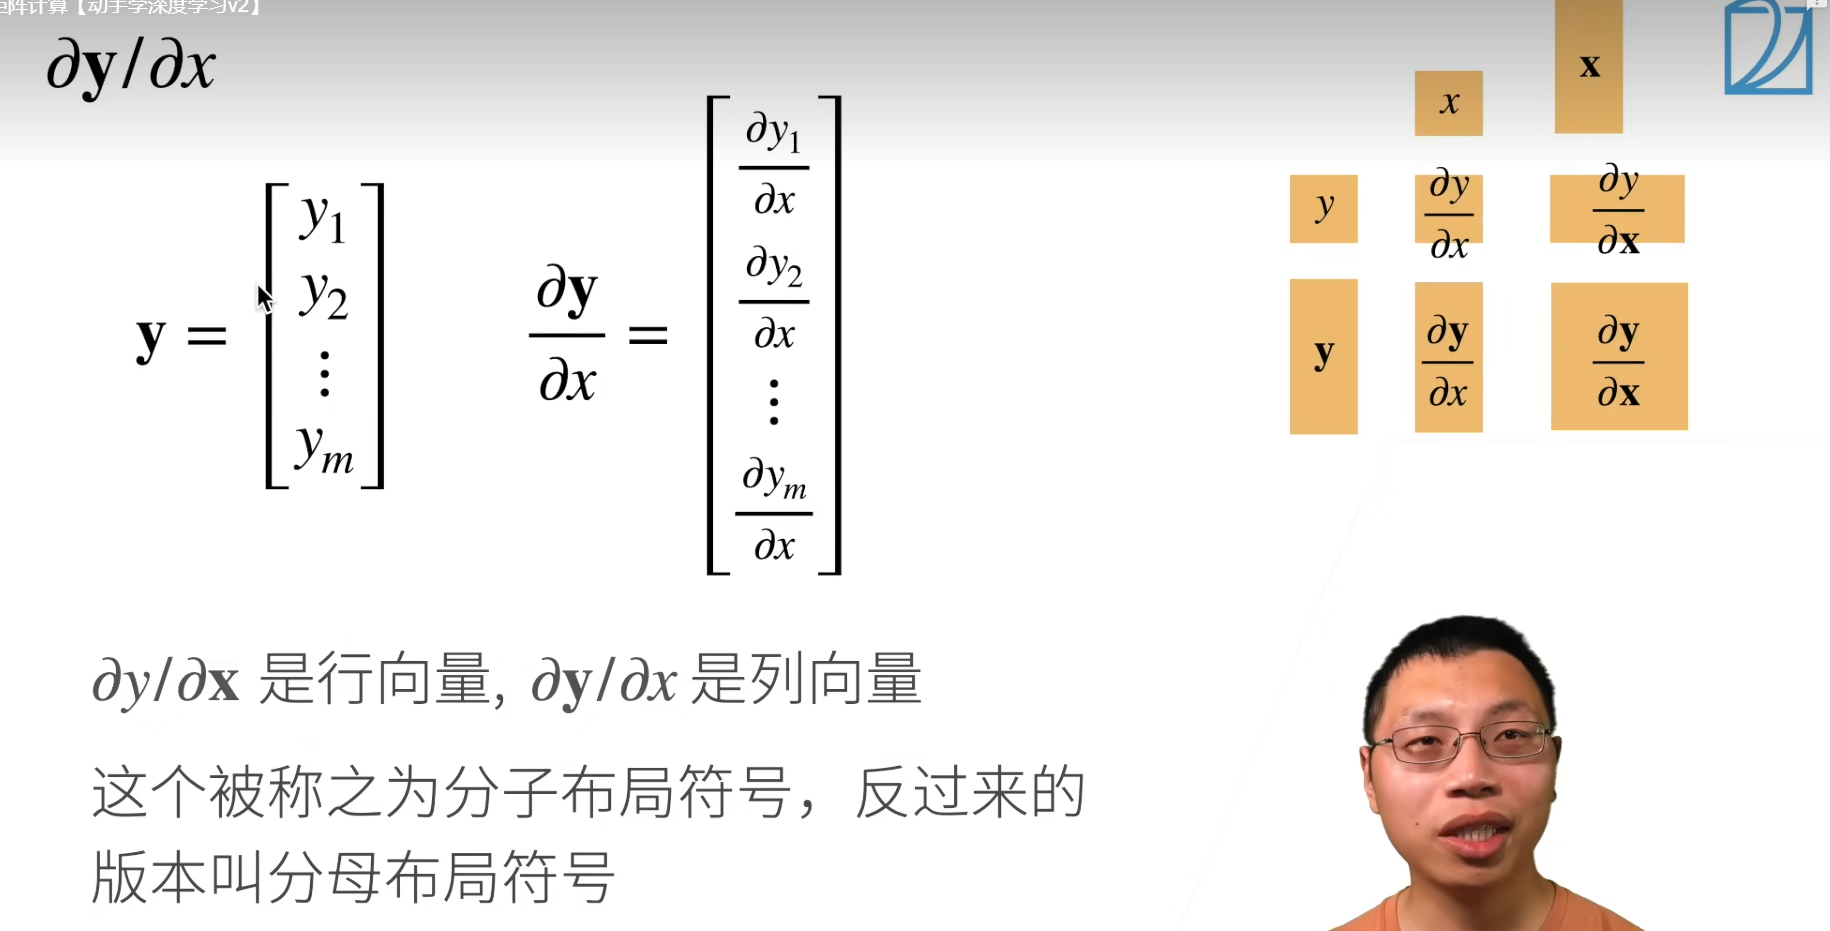

分子布局，就是分子是列向量形式，分母是行向量形式，结果是列向量形式展开  
分母布局，就是分母是列向量形式，分子是行向量形式，结果是行向量形式展开

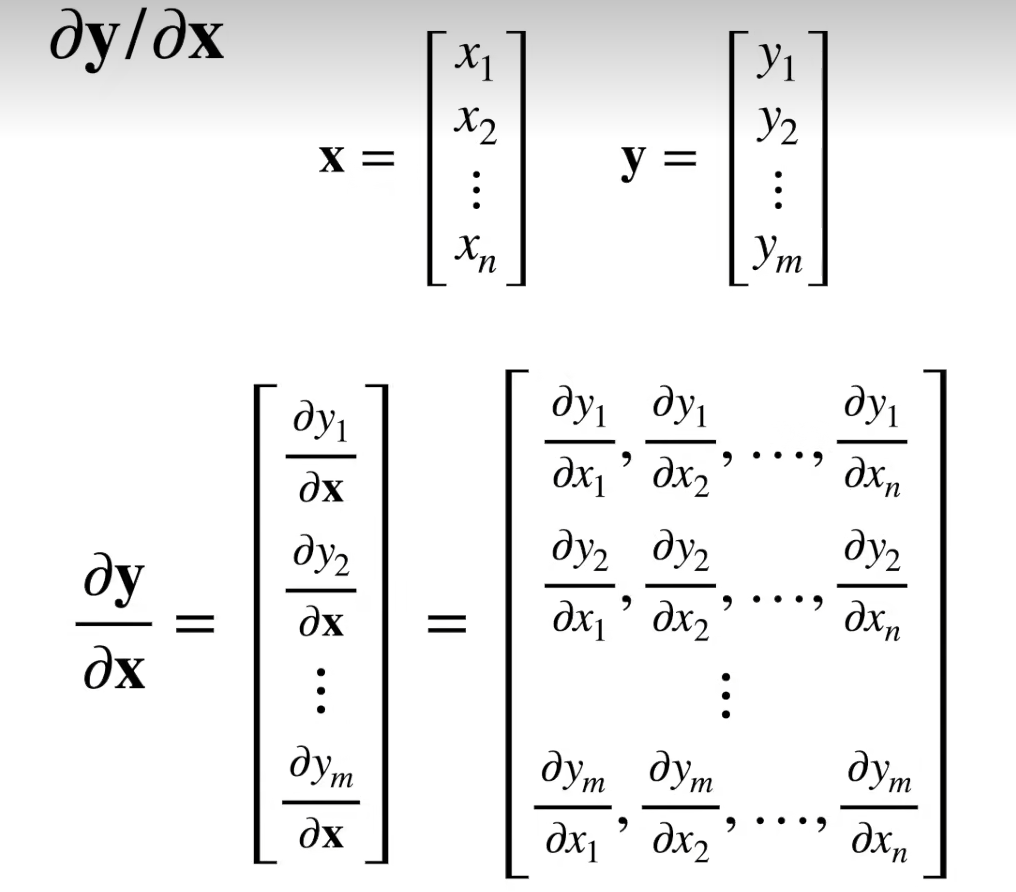

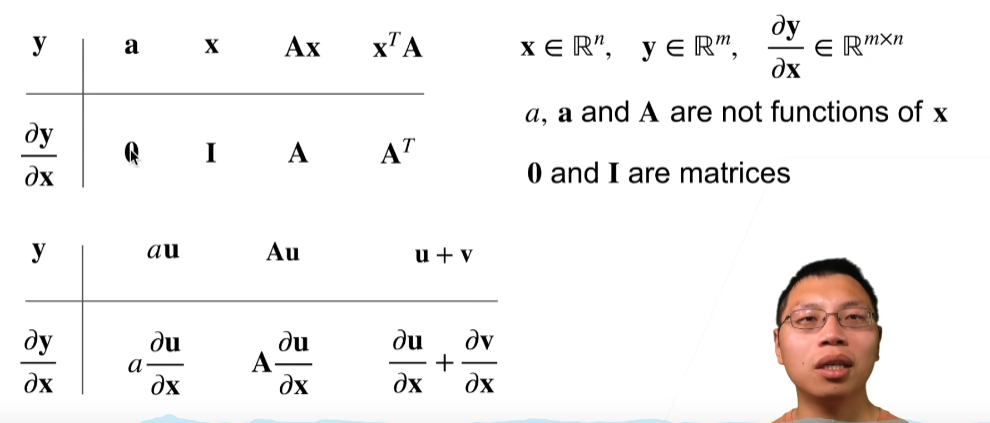

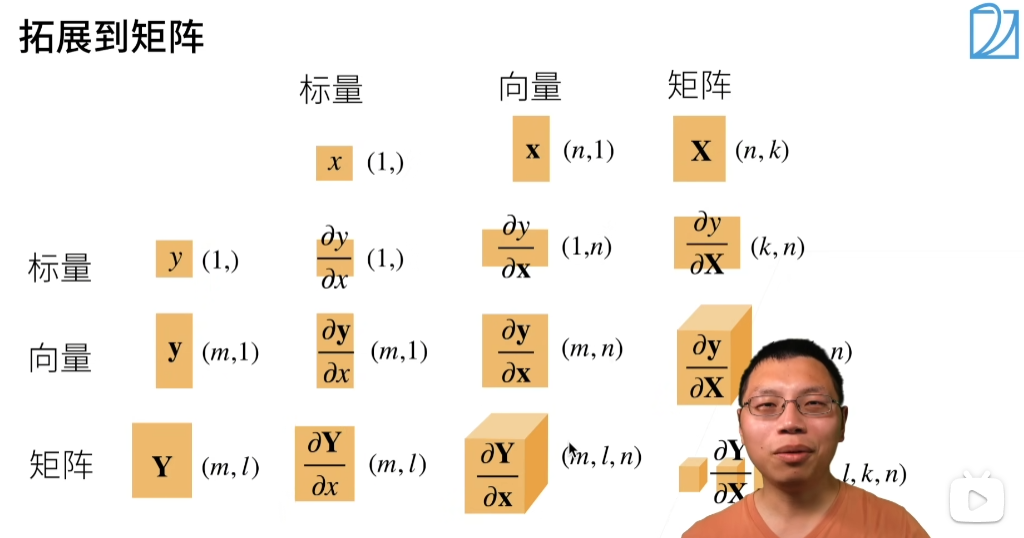

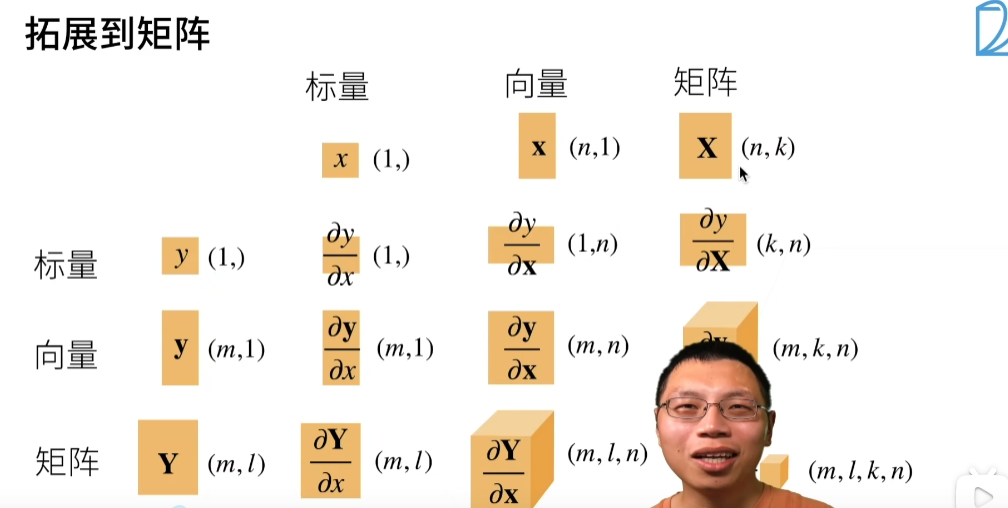

1、标量求导，高中常识；  

2、y是标量，x是向量的情况。实际上就是y=f(x1,x2,...,xn)的意思。拿y=f(x1,x2)为例解释，有一个三维坐标轴体系，水平面的横轴和竖轴分别是x1、x2，立面上的轴是y，水平面上任意一个点(x1,x2)都对应y轴上的一个点，很明显这就是一个面，因此他的导数是一个向量，所以结果是横着写的。  

3、y是向量，x是标量的情况。这实际上就是【y1,y2,...,yn】=【f1(x),f2(x),...,fn(x)】，对x求导就是求出y=yi时那一个点上的斜率，是标量，所以结果是竖着写的。  

4、y、x都是向量的情况。根据上面描述，求导实际上就是求出了y=yi时，那一个平面形状边缘上的向量，因此是横着写的

求导是按列优先进行求导，然后按行优先放到结果矩阵里

矩阵求导的本质与分子布局、分母布局的本质（矩阵求导——本质篇）：https://zhuanlan.zhihu.com/p/263777564  
矩阵求导公式的数学推导（矩阵求导——基础篇）：https://zhuanlan.zhihu.com/p/273729929  
矩阵求导公式的数学推导（矩阵求导——进阶篇）：https://zhuanlan.zhihu.com/p/288541909

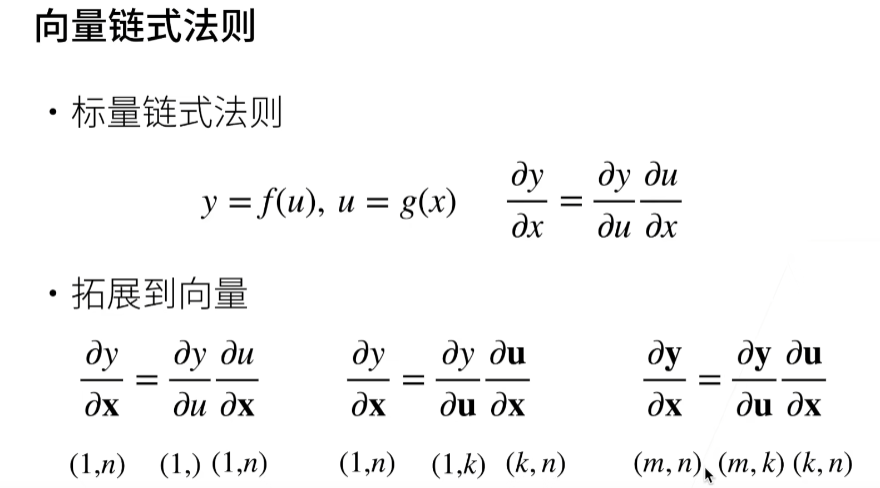

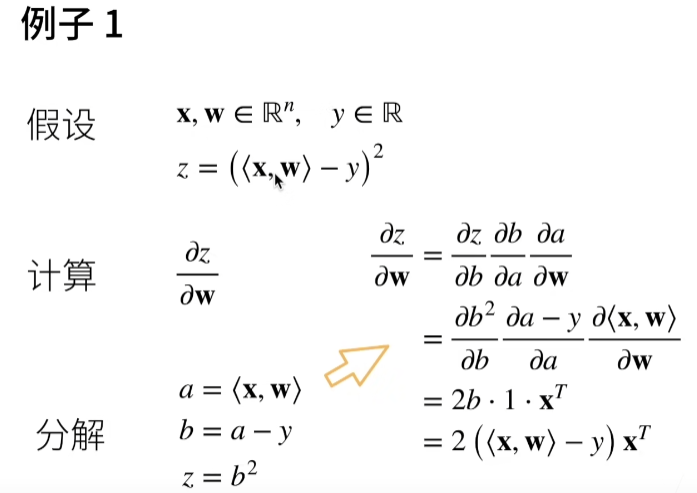

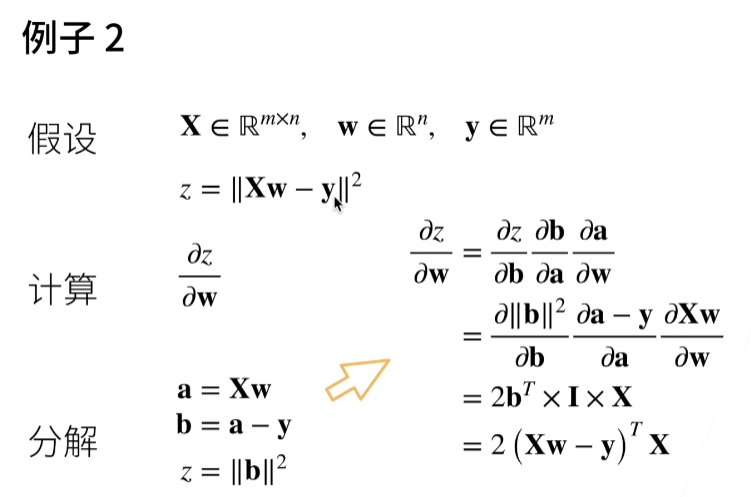

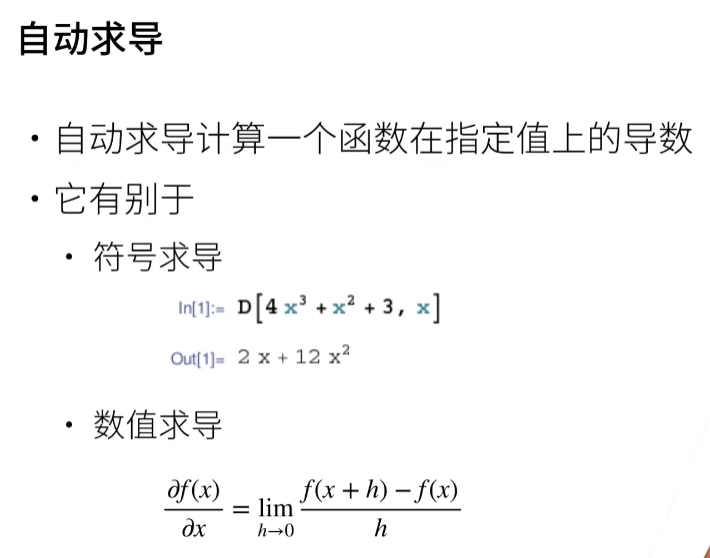

计算图

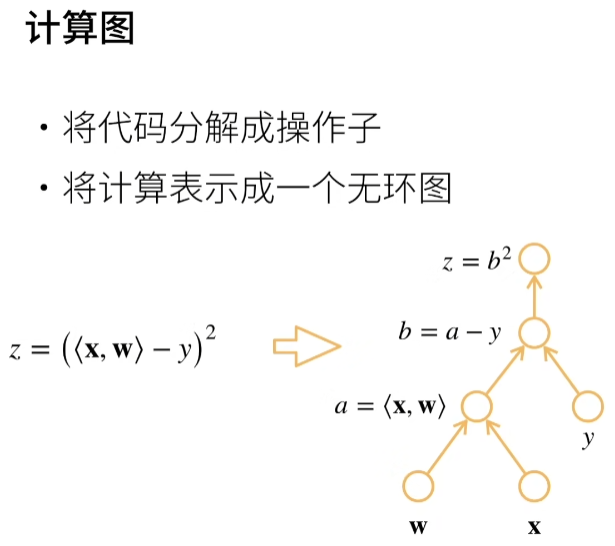

计算图构造，加入中间变量a，每一个做成计算子

In [ ]:
# 显示构造 由Tensorflow/Theano/MXNet
from Mxnet import sym

a = sym.var()
b = sym.var()
c = 2 * a + b

In [ ]:
# 隐式构造 由PyTorch/MXNet
from mxnet import autograd, nd

with autograd.record():
    a = nd.ones((2, 1))
    b = nd.ones((2, 1))
    c = 2 * a + b

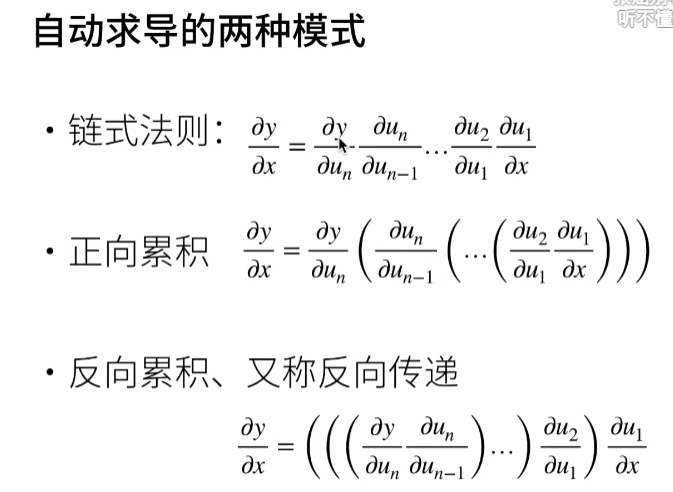

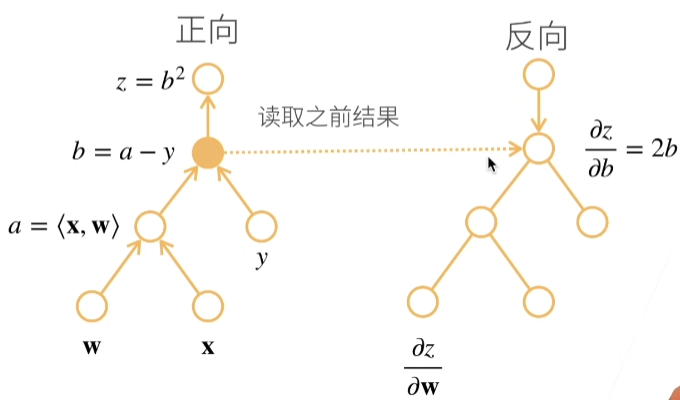

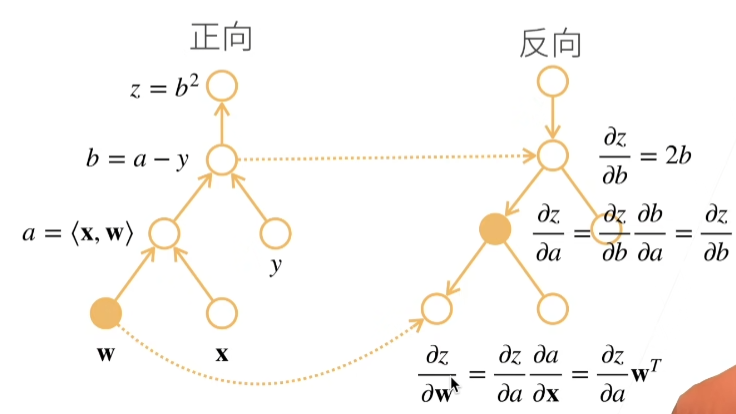

正向累积：a对x求偏导，乘以b对a求偏导，一直到最顶部z对b的偏导。  
反向累积：先计算z对b的导数，z、b、a是正向传播时构建计算图存储了结果，则可以根据存储计算图结构进行求导计算，z对a求导数，即z对b在对a求导，以此类推到最底部。

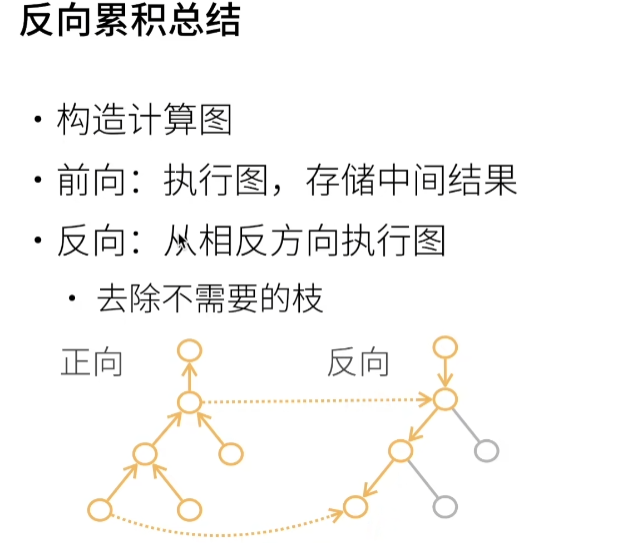

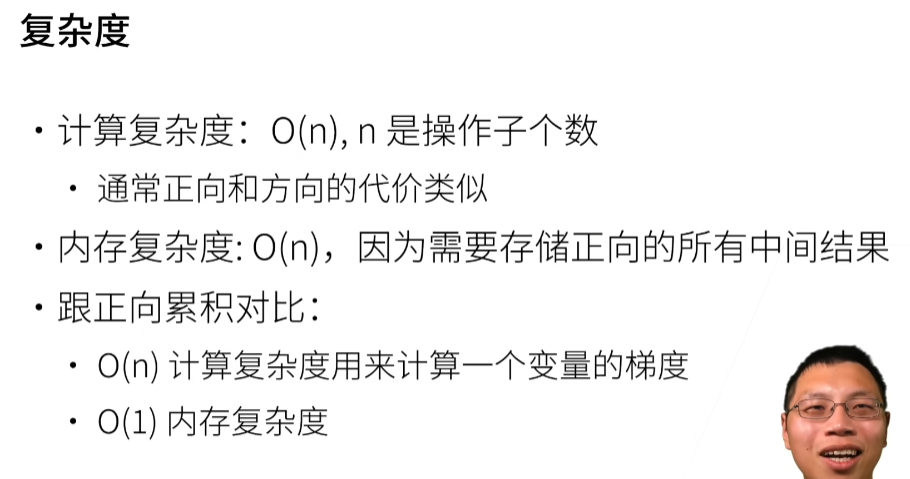

正向求导和反向累积本质类似，正向求导不存数，只存一个数，不停更新这个数，最后得到导数，每次计算一个变量的梯度都得扫一遍计算图；而反向累积就是把数都存起来，到时候求什么就取需要的数来用。同时自动求导的每一步也得利用符号求导或者数值求导。

In [166]:
# 是一个在Jupyter Notebook或JupyterLab等环境中使用的IPython魔法命令（magic command）。
# 它的作用是让matplotlib生成的图表直接嵌入到Notebook的页面中，而不是在一个新的窗口中打开。
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [167]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [171]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [172]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [173]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

1
1


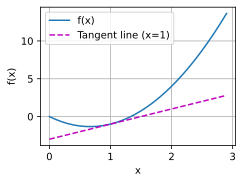

In [174]:
# @save
import pdb


def plot(
    X,
    Y=None,
    xlabel=None,
    ylabel=None,
    legend=None,
    xlim=None,
    ylim=None,
    xscale="linear",
    yscale="linear",
    fmts=("-", "m--", "g-.", "r:"),
    figsize=(3.5, 2.5),
    axes=None,
):
    """绘制数据点"""
    if legend is None:
        legend = []

    # gca是get current axis的首字母的缩写，获取当前轴对象
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True

    # 检查输入的X是否具有作为一个轴（维度）的数据结构。
    # hastter检查对象是否包含指定的属性
    #  X.ndim == 1表示是一个一维数组
    # isinstance检查对象是否为一个已知的数据类型
    # 在 Python 中，拥有 __len__ 方法的对象通常是可以迭代的，并且可能包含多个元素（例如列表、元组、字符串等），not表示为标量
    def has_one_axis(X):
        return (
            hasattr(X, "ndim")
            and X.ndim == 1
            or isinstance(X, list)
            and not hasattr(X[0], "__len__")
        )

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()  #    清屏
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
            print("1")
        else:
            axes.plot(y, fmt)
            print("2")
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


if __name__ == "__main__":
    x = np.arange(0, 3, 0.1)
    plot(x, [f(x), 2 * x - 3], "x", "f(x)", legend=["f(x)", "Tangent line (x=1)"])

In [175]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [176]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

1
1


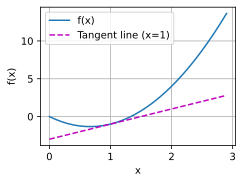

In [190]:
# @save
import numpy as np


def my_plot(
    X,
    Y=None,
    xlabel=None,
    ylabel=None,
    legend=None,
    xlim=None,
    ylim=None,
    xscale="linear",
    yscale="linear",
    fmts=("-", "m--", "g-.", "r:"),
    figsize=(3.5, 2.5),
    axes=None,
):
    """绘制数据点"""
    if legend is None:
        legend = []

    # gca是get current axis的首字母的缩写，获取当前轴对象
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True

    # 检查输入的X是否具有作为一个轴（维度）的数据结构。
    # hastter检查对象是否包含指定的属性
    #  X.ndim == 1表示是一个一维数组
    # isinstance检查对象是否为一个已知的数据类型
    # 在 Python 中，拥有 __len__ 方法的对象通常是可以迭代的，并且可能包含多个元素（例如列表、元组、字符串等），not表示为标量
    def has_one_axis(X):
        return (
            hasattr(X, "ndim")
            and X.ndim == 1
            or isinstance(X, list)
            and not hasattr(X[0], "__len__")
        )

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()  #    清屏
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt) # 这里的axes是d2l.plt.gca()，调用的是axes的也就是系统的plot，非这里定义的plot
            print("1")
        else:
            axes.plot(y, fmt)
            print("2")
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


if __name__ == "__main__":
    x = np.arange(0, 3, 0.1) # 0-3,间隔0.1
    my_plot(x, [f(x), 2 * x - 3], "x", "f(x)", legend=["f(x)", "Tangent line (x=1)"])

<bound method Axes.plot of <Axes: >>

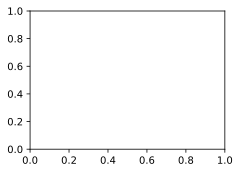

In [189]:
x=[1,2,3]
d2l.plt.gca().plot

补充：plt.gca()的作用

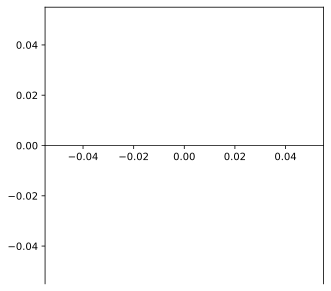

In [178]:
import matplotlib.pyplot as plt

# 这里建立的画布大小是5*5的，并不是坐标轴范围，使用“十字按钮”拖动你就懂了！
plt.figure(figsize = (5,5))
plt.plot()  # 画个只有坐标系的图（因为没有传参数，所以显示空白）

ax = plt.gca()

# 获取你想要挪动的坐标轴，这里只有顶部、底部、左、右四个方向参数
ax.xaxis.set_ticks_position('bottom')  #  要挪动底部的X轴，所以先目光锁定底部！

# 在这里，position位置参数有三种，这里用到了“按Y轴刻度位置挪动”
# 'data'表示按数值挪动，其后数字代表挪动到Y轴的刻度值
ax.spines['bottom'].set_position(('data',0))
plt.show()


In [179]:
a=0
b=0
if a:
    print("1")
elif b:
    print("2")

微积分练习

1
1


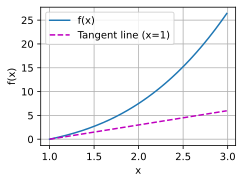

In [202]:
# 1
x = np.arange(1, 3, 0.01)
plot(x, [x**3 - 1 / x, 3 * x - 3], "x", "f(x)", legend=["f(x)", "Tangent line (x=1)"])

自动微分

In [256]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [257]:
# 保存数据计算梯度，保存在grad属性中，也就是y关于x的导数
# 当你调用 .backward() 方法进行反向传播时，PyTorch 会自动计算所有 requires_grad=True 的张量的梯度，并将这些梯度存储在各自的 .grad 属性中。
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

In [258]:
y = 2 * torch.dot(x, x) # 点积  y=2*x^2
y

tensor(28., grad_fn=<MulBackward0>)

In [259]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [260]:
x.grad == 4 * x

tensor([True, True, True, True])

In [261]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()   # 不写这行代码，每次计算都会累加梯度
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

y作为向量时的反向传播

In [271]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward() # 使用sum()，转化为 y=x1^2 + x2^2 + …… + xn^2 对标量函数求导 
# grad_tensor = torch.ones_like(y)  # 创建一个与 y 形状相同的张量，其元素全部为 1  
# y.backward(gradient=grad_tensor)
x.grad

tensor([0., 2., 4., 6.])

{
	"name": "RuntimeError",
	"message": "Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.",
	"stack": "---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
Cell In[218], line 8
      6 y.sum().backward()
      7 print(\"1\",x.grad)
----> 8 y.sum().backward()
      9 print(\"2\",x.grad)

File e:\\software\\anaconda3\\envs\\pytorch-gpu\\lib\\site-packages\\torch\\_tensor.py:488, in Tensor.backward(self, gradient, retain_graph, create_graph, inputs)
    478 if has_torch_function_unary(self):
    479     return handle_torch_function(
    480         Tensor.backward,
    481         (self,),
   (...)
    486         inputs=inputs,
    487     )
--> 488 torch.autograd.backward(
    489     self, gradient, retain_graph, create_graph, inputs=inputs
    490 )

File e:\\software\\anaconda3\\envs\\pytorch-gpu\\lib\\site-packages\\torch\\autograd\\__init__.py:197, in backward(tensors, grad_tensors, retain_graph, create_graph, grad_variables, inputs)
    192     retain_graph = create_graph
    194 # The reason we repeat same the comment below is that
    195 # some Python versions print out the first line of a multi-line function
    196 # calls in the traceback and some print out the last line
--> 197 Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    198     tensors, grad_tensors_, retain_graph, create_graph, inputs,
    199     allow_unreachable=True, accumulate_grad=True)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward."
}

分离计算

y是关于x的函数，z是作为y和x的函数

可以分离y来返回一个新变量u，该变量与y具有相同的值，但丢弃计算图中如何计算y的任何信息，也就是说梯度不会向后流经u到x

In [213]:
x.grad.zero_()
y = x * x
u = y.detach() # 使用detach()可以创建一个新的张量，它与原张量共享数据，但具有不同的历史记录（即，在自动微分计算图中没有梯度路径）
z = u * x  # 相当于一个常数乘x

z.sum().backward()
x.grad == u # 所以求导后为u

tensor([True, True, True, True])

In [214]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [215]:
def f(a):
    b = a * 2
    while b.norm() < 1000:  # norm()计算矩阵范数
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a= torch.randn(size=(),requires_grad=True)  
d = f(a)  
看完函数f(a) 得d=f(a)=c, c为b 或者 b*100  
且 b 为a*2 或者 a*(n个2 2n=实数)  
综上得 d 最终结果都是 此处用A代表实数 a*A  
则 d=f(a)=Aa  
对 d 求导得 A  
d.backward()  
a.grad == d/a  
d=Aa 故d/a = 实数A a的导数 a.grad = 实数A  

In [269]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward(), a

(None, tensor(-0.6821, requires_grad=True))

In [268]:
a.grad == d / a

tensor(True)

为什么y要使用sum()?  
沐神的回答是loss一般是一个标量，而不是向量或者矩阵。所以“深度学习中，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和”。

为什么Pytorch会默认累积梯度?
样本太多，一次计算需要占用很多内存，所以需将大样本分割为多个小样本进行累积计算，这时候需要累积梯度来批量计算每个样本的偏导数之和。  
用在做multi-modality（多模态）的weight（权值）在不同模型share的时候


In [273]:
# a = torch.randn(size=(3, 3), requires_grad=True)
# d = f(a)
# d.backward(),a

练习

In [ ]:
# {
# 	"name": "RuntimeError",
# 	"message": "grad can be implicitly created only for scalar outputs",
# 	"stack": "---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
# Cell In[272], line 3
#       1 a = torch.randn(size=(3, 3), requires_grad=True)
#       2 d = f(a)
# ----> 3 d.backward(),a

# File e:\\software\\anaconda3\\envs\\pytorch-gpu\\lib\\site-packages\\torch\\_tensor.py:488, in Tensor.backward(self, gradient, retain_graph, create_graph, inputs)
#     478 if has_torch_function_unary(self):
#     479     return handle_torch_function(
#     480         Tensor.backward,
#     481         (self,),
#    (...)
#     486         inputs=inputs,
#     487     )
# --> 488 torch.autograd.backward(
#     489     self, gradient, retain_graph, create_graph, inputs=inputs
#     490 )

# File e:\\software\\anaconda3\\envs\\pytorch-gpu\\lib\\site-packages\\torch\\autograd\\__init__.py:190, in backward(tensors, grad_tensors, retain_graph, create_graph, grad_variables, inputs)
#     186 inputs = (inputs,) if isinstance(inputs, torch.Tensor) else \\
#     187     tuple(inputs) if inputs is not None else tuple()
#     189 grad_tensors_ = _tensor_or_tensors_to_tuple(grad_tensors, len(tensors))
# --> 190 grad_tensors_ = _make_grads(tensors, grad_tensors_, is_grads_batched=False)
#     191 if retain_graph is None:
#     192     retain_graph = create_graph

# File e:\\software\\anaconda3\\envs\\pytorch-gpu\\lib\\site-packages\\torch\\autograd\\__init__.py:85, in _make_grads(outputs, grads, is_grads_batched)
#      83 if out.requires_grad:
#      84     if out.numel() != 1:
# ---> 85         raise RuntimeError(\"grad can be implicitly created only for scalar outputs\")
#      86     new_grads.append(torch.ones_like(out, memory_format=torch.preserve_format))
#      87 else:

# RuntimeError: grad can be implicitly created only for scalar outputs"
# }

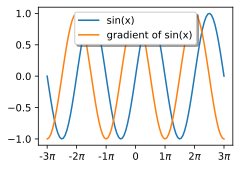

In [277]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np
import torch

f,ax=plt.subplots(1)

x = np.linspace(-3*np.pi, 3*np.pi, 100)
x1= torch.tensor(x, requires_grad=True)
y1= torch.sin(x1)
y1.sum().backward()

ax.plot(x,np.sin(x),label="sin(x)")
ax.plot(x,x1.grad,label='gradient of sin(x)')
ax.legend(loc='upper center', shadow=True)

ax.xaxis.set_major_formatter(FuncFormatter(
lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

plt.show()